In [1]:
import os
import matplotlib.pyplot as plt
import re
import numpy as np
from scipy import stats
#import optshrink as opt # package we create
import numpy as np
# import scipy.io as sio
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import seaborn as sns
from shapely.geometry import Point
import geopandas as gp
from geodatasets import get_path
from shapely.geometry import Polygon

In [2]:
dir_path = '/group/moniergrp/TEM_Large_Ensemble/output_files/' 
region = 'region_1/'

In [3]:
####read in tem variables
tem_var = pd.read_csv(dir_path+region+'future_tem_outputs_merge.csv')
tem_var_equil = pd.read_csv(dir_path+region+'pre_data_tem_outputs_merge.csv')
tem_var_hist = pd.read_csv(dir_path+region+'historical_tem_outputs_merge.csv')

### read in climate data
clm_var = pd.read_csv(dir_path+region+'future_climate_inputs.csv')
# clm_var_equil = pd.read_csv(dir_path+region+'pre_data_climate_inputs.csv')
# clm_var_hist = pd.read_csv(dir_path+region+'historical_climate_inputs.csv')

In [4]:
# tem_var_plt_c.groupby('forest_type')[['VEGC_monthly_mean','SOILORGC_monthly_mean']].mean()

In [4]:
tem_var['coords'] = tem_var['lon'].astype(str)+tem_var['lat'].astype(str)
clm_var['coords'] = clm_var['lon'].astype(str)+clm_var['lat'].astype(str)

In [11]:
check_wind.columns

Index(['model_x', 'scenario_x', 'grid_group', 'lon', 'lat', 'forest_type',
       'current_veg', 'year', 'silt_clay', 'stand_age_interval_min',
       'cohort_area', 'land_area', 'AVAILN_monthly_mean',
       'AVAILN_cohort_annual_change_delta',
       'AVAILN_cohort_annual_change_percent', 'GPP_monthly_mean',
       'GPP_cohort_annual_change_delta', 'GPP_cohort_annual_change_percent',
       'LAI_monthly_mean', 'LAI_cohort_annual_change_delta',
       'LAI_cohort_annual_change_percent', 'NCE_monthly_mean',
       'NCE_cohort_annual_change_delta', 'NCE_cohort_annual_change_percent',
       'NEP_monthly_mean', 'NEP_cohort_annual_change_delta',
       'NEP_cohort_annual_change_percent', 'NETNMIN_monthly_mean',
       'NETNMIN_cohort_annual_change_delta',
       'NETNMIN_cohort_annual_change_percent', 'NPP_monthly_mean',
       'NPP_cohort_annual_change_delta', 'NPP_cohort_annual_change_percent',
       'SOILORGC_monthly_mean', 'SOILORGC_cohort_annual_change_delta',
       'SOILORGC_cohor

In [10]:
check_high_values = tem_var_equil.loc[tem_var_equil['VEGC_monthly_mean']> 40000]
check_high_values

model  grid_group    lon   lat  \
1348540  MPIxxESM1xx2xxLR         455 -123.0  37.5   
1533382      MRIxxESM2xx0         520 -121.5  39.0   

                                     forest_type  current_veg  year  \
1348540                  Mixed Temperate Forests            8  1589   
1533382  Temperate Broadleaved Evergreen Forests           33  1565   

         silt_clay  stand_age_interval_min  cohort_area  ...  \
1348540      67.63                      25            1  ...   
1533382      54.09                      15            1  ...   

         SOILORGC_cohort_annual_change_percent  VEGC_monthly_mean  \
1348540                                 110.10          167794.27   
1533382                                  48.43           42920.54   

         VEGC_cohort_annual_change_delta  VEGC_cohort_annual_change_percent  \
1348540                        139576.79                               4.95   
1533382                         31691.72                               2.82   

         VEGINNPP_monthly_mean  VEGINNPP_cohort_annual_change_delta  \
1348540               -7281.62                               222.23   
1533382               -6665.23                             -3061.19   

         VEGINNPP_cohort_annual_change_percent  VSM_monthly_mean  \
1348540                                  -0.03             30.30   
1533382                                   0.85             25.75   

         VSM_cohort_annual_change_delta  VSM_cohort_annual_change_percent  
1348540                           -0.60                             -0.02  
1533382                           -1.03                             -0.04  

[2 rows x 44 columns]

In [11]:
check_high_values = tem_var_hist.loc[tem_var_hist['VEGC_monthly_mean']> 40000]
check_high_values

model  grid_group    lon   lat  \
537755   AWIxxCMxx1xx1xxMR           0 -159.0  62.5   
537756   AWIxxCMxx1xx1xxMR           0 -159.0  62.5   
537757   AWIxxCMxx1xx1xxMR           0 -159.0  62.5   
537758   AWIxxCMxx1xx1xxMR           0 -159.0  62.5   
537759   AWIxxCMxx1xx1xxMR           0 -159.0  62.5   
...                    ...         ...    ...   ...   
4399416       MRIxxESM2xx0         260 -128.0  52.0   
4399439       MRIxxESM2xx0         260 -128.0  52.0   
4399462       MRIxxESM2xx0         260 -128.0  52.0   
4399485       MRIxxESM2xx0         260 -128.0  52.0   
4399508       MRIxxESM2xx0         260 -128.0  52.0   

                          forest_type  current_veg  year  silt_clay  \
537755                  Boreal Forest            4  1888      61.41   
537756                  Boreal Forest            4  1889      61.41   
537757                  Boreal Forest            4  1890      61.41   
537758                  Boreal Forest            4  1891      61.41   
537759                  Boreal Forest            4  1892      61.41   
...                               ...          ...   ...        ...   
4399416  Temperate Coniferous Forests            9  2010      35.82   
4399439  Temperate Coniferous Forests            9  2011      35.82   
4399462  Temperate Coniferous Forests            9  2012      35.82   
4399485  Temperate Coniferous Forests            9  2013      35.82   
4399508  Temperate Coniferous Forests            9  2014      35.82   

         stand_age_interval_min  cohort_area  ...  \
537755                      150         1415  ...   
537756                      150         1415  ...   
537757                      150         1415  ...   
537758                      150         1415  ...   
537759                      150         1415  ...   
...                         ...          ...  ...   
4399416                     150         1427  ...   
4399439                     150         1421  ...   
4399462                     150         1414  ...   
4399485                     150         1408  ...   
4399508                     150         1401  ...   

         SOILORGC_cohort_annual_change_percent  VEGC_monthly_mean  \
537755                                     0.0           40003.11   
537756                                     0.0           40013.99   
537757                                     0.0           40025.03   
537758                                     0.0           40034.91   
537759                                     0.0           40045.07   
...                                        ...                ...   
4399416                                    0.0          427371.53   
4399439                                    0.0          427453.69   
4399462                                    0.0          427535.27   
4399485                                    0.0          427617.34   
4399508                                    0.0          427697.33   

         VEGC_cohort_annual_change_delta  VEGC_cohort_annual_change_percent  \
537755                             11.98                                0.0   
537756                             10.88                                0.0   
537757                             11.04                                0.0   
537758                              9.88                                0.0   
537759                             10.16                                0.0   
...                                  ...                                ...   
4399416                            86.84                                0.0   
4399439                            82.16                                0.0   
4399462                            81.58                                0.0   
4399485                            82.07                                0.0   
4399508                            79.99                                0.0   

         VEGINNPP_monthly_mean  VEGINNPP_cohort_annual_change_delta  \
537755               

In [15]:
tem_var_equil.loc[1348540]

model                                           MPIxxESM1xx2xxLR
grid_group                                                   455
lon                                                       -123.0
lat                                                         37.5
forest_type                              Mixed Temperate Forests
current_veg                                                    8
year                                                        1589
silt_clay                                                  67.63
stand_age_interval_min                                        25
cohort_area                                                    1
land_area                                                   1085
AVAILN_monthly_mean                                    -97762.58
AVAILN_cohort_annual_change_delta                      -35592.86
AVAILN_cohort_annual_change_percent                         0.57
GPP_monthly_mean                                           30.03
GPP_cohort_annual_change_

<Axes: xlabel='year', ylabel='VEGC_monthly_mean'>

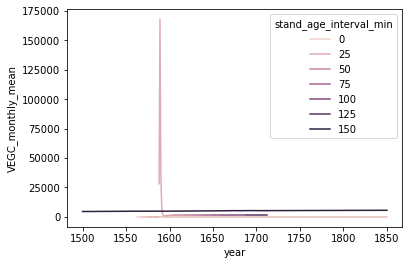

In [19]:
sns.lineplot(data = tem_var_equil.loc[
(tem_var_equil['lon']==-123)
&    (tem_var_equil['lat']==37.5)
&    (tem_var_equil['model']=='MPIxxESM1xx2xxLR')
],
            x = 'year', y = 'VEGC_monthly_mean', hue = 'stand_age_interval_min')

<Axes: xlabel='year', ylabel='VEGC_monthly_mean'>

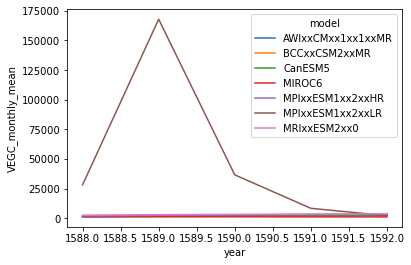

In [20]:
sns.lineplot(data = tem_var_equil.loc[
(tem_var_equil['lon']==-123)
&    (tem_var_equil['lat']==37.5)
&    (tem_var_equil['stand_age_interval_min']==25)
],
            x = 'year', y = 'VEGC_monthly_mean', hue = 'model')

In [13]:
check_high_values[['model']].value_counts()

model            
MIROC6               6796
MRIxxESM2xx0         6756
MPIxxESM1xx2xxHR     4938
AWIxxCMxx1xx1xxMR     863
BCCxxCSM2xxMR           1
MPIxxESM1xx2xxLR        1
dtype: int64

In [ ]:
#how often are there large y/y spikes?
#how often are there large baseline spikes?

In [12]:
check_wind = tem_var.loc[tem_var['VEGC_monthly_mean']> 1000000]

check_wind=check_wind.merge(clm_var, on = ['lon', 'lat', 'year','coords', 'model', 'scenario'])
check_wind[['wind_min', 'wind_avg']].mean()


wind_min    0.473526
wind_avg    1.654937
dtype: float64

In [13]:
check_wind.model.unique()

array(['AWIxxCMxx1xx1xxMR', 'MRIxxESM2xx0'], dtype=object)

In [14]:
clm_var.loc[(clm_var['coords'].isin(check_wind['coords']))
            & (clm_var['year'].isin(check_wind['year']))
            & (~clm_var['model'].isin(check_wind['model']))
            , ['wind_min', 'wind_avg']].mean()

wind_min    0.616365
wind_avg    2.142045
dtype: float64

In [5]:
tt = tem_var.merge(clm_var, on = ['lon', 'lat', 'year','coords', 'model', 'scenario'])

tt['instability'] = 1*(tt['VEGC_monthly_mean']> 1000000)
tt['extreme_values'] = 1*(tt['VEGC_monthly_mean']> 100000)
tt.loc[tt['VEGC_monthly_mean']> 1000000, 'extreme_values'] = 2

In [6]:
tt['extreme_values'].value_counts()

0    21273931
1       50536
2         553
Name: extreme_values, dtype: int64

In [16]:
50536/21273931

0.002375489513433131

In [24]:
len(tt)

21325020

In [7]:
downsampled_ratio = 0.05  
downsampled_df = tt.loc[tt['extreme_values']==0].sample(frac=downsampled_ratio)
downsampled_df = pd.concat([downsampled_df,tt.loc[tt['extreme_values']>=1]])

downsampled_df['extreme_values'].value_counts()

0    1063697
1      50536
2        553
Name: extreme_values, dtype: int64

In [12]:
# downsampled_df['extreme_values'] = downsampled_df['extreme_values'].astype(str)
prefixes = ['tair', 'trange', 'wind', 'nirr','vpr','prec']
# prefixes = ['tair']
space_plot = ['tair_avg', 'trange_avg', 'wind_avg', 'nirr_avg','vpr_avg','prec_avg','extreme_values' ]


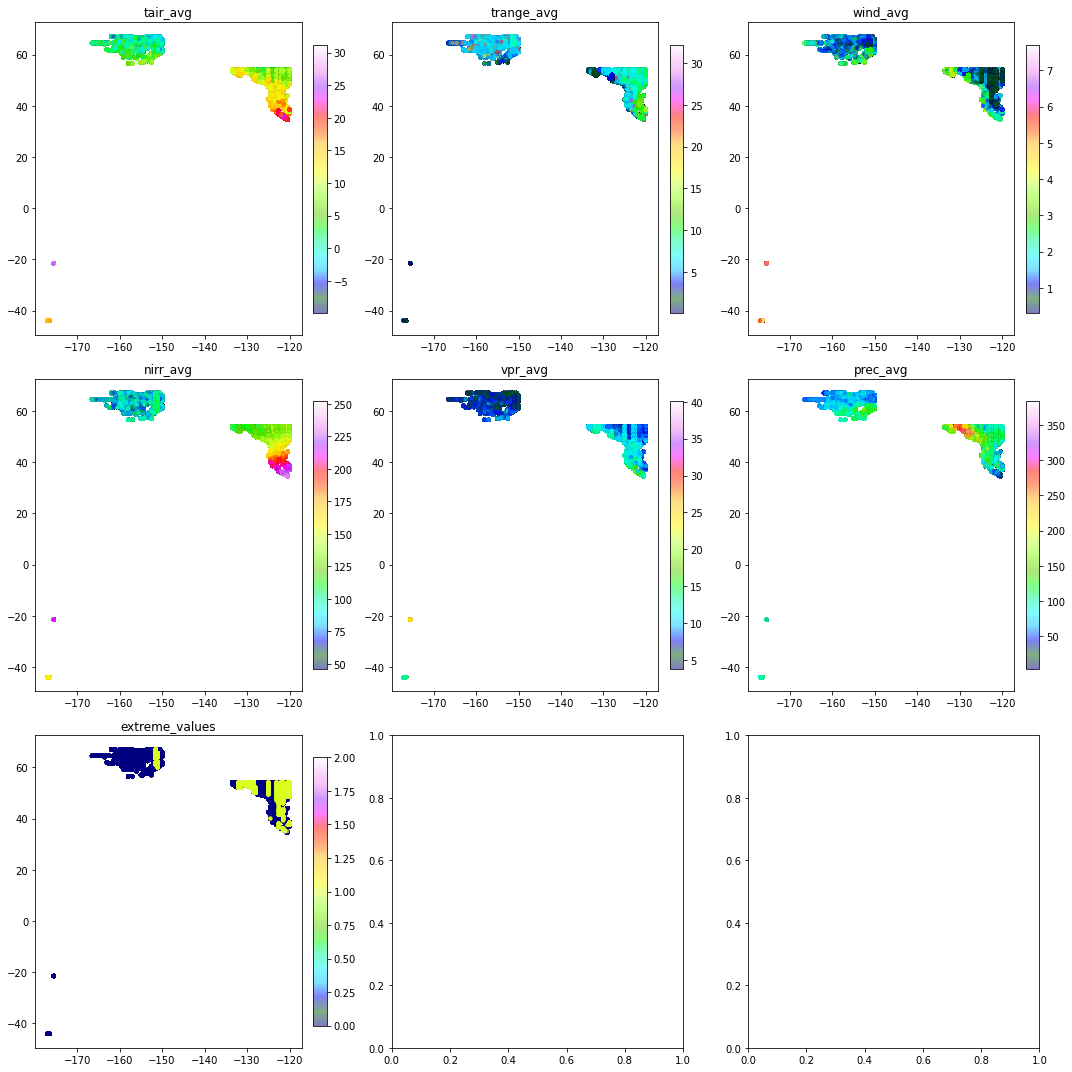

In [14]:
num_columns = 3  # Number of subplots per row
fig, axes = plt.subplots(num_columns, num_columns, figsize=(15, num_columns * 5))  # Adjust the figure size if needed

axes = axes.flatten()  # Flatten axes array for easy iteration if it's 2D

for i in range(min(len(space_plot), len(axes))):  # Avoid overflowing the number of subplots
    ax = axes[i]
    scatter = ax.scatter(
        downsampled_df['lon'],
        downsampled_df['lat'],
        c=downsampled_df[space_plot[i]],
        cmap='gist_ncar',
        alpha=0.5,  # Transparency
        s=10  # Point size
    )
    ax.set_title(f'{space_plot[i]}')

    # Create a color bar for each subplot
    fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)

    # If you have specific labels for each axis, use these lines
    # ax.set_xlabel('Longitude')
    # ax.set_ylabel('Latitude')

# Adjust the layout to fit everything properly
plt.tight_layout()

# Display the plot
plt.show()

/tmp/ipykernel_380706/3227121731.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rectangle in which to fit the subplots


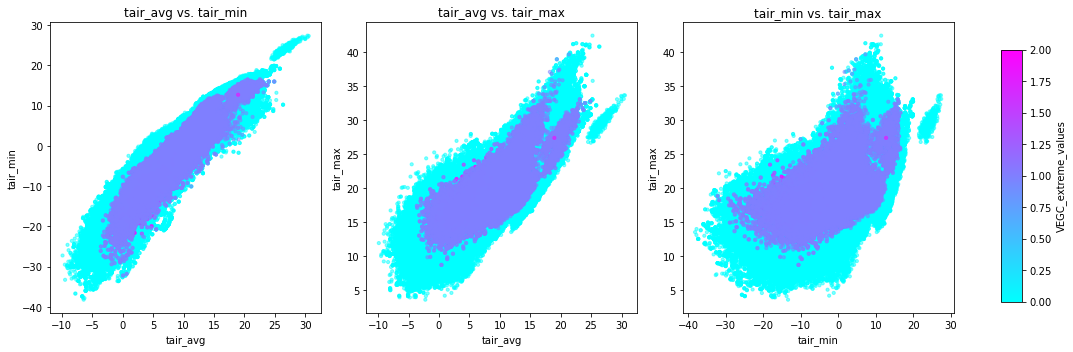

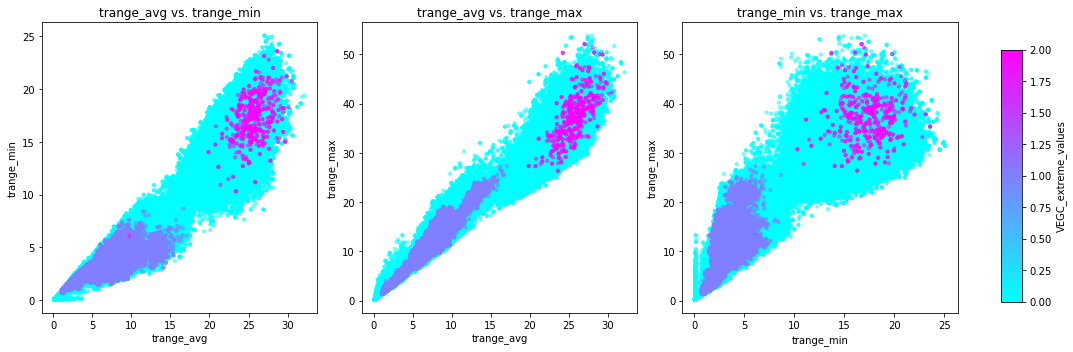

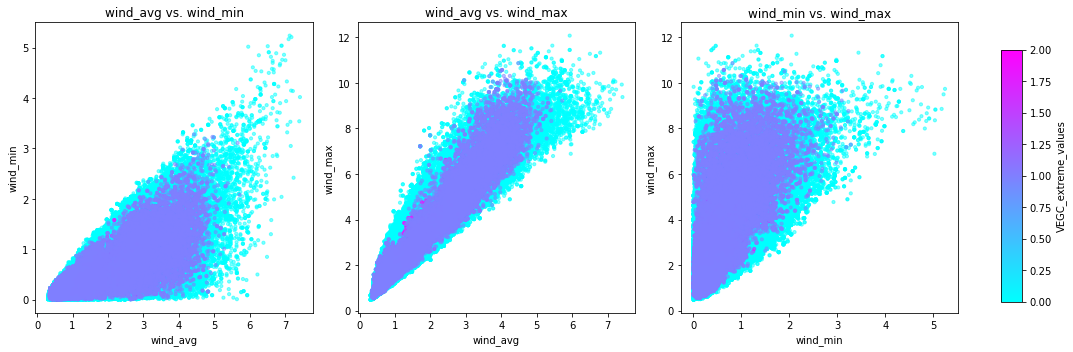

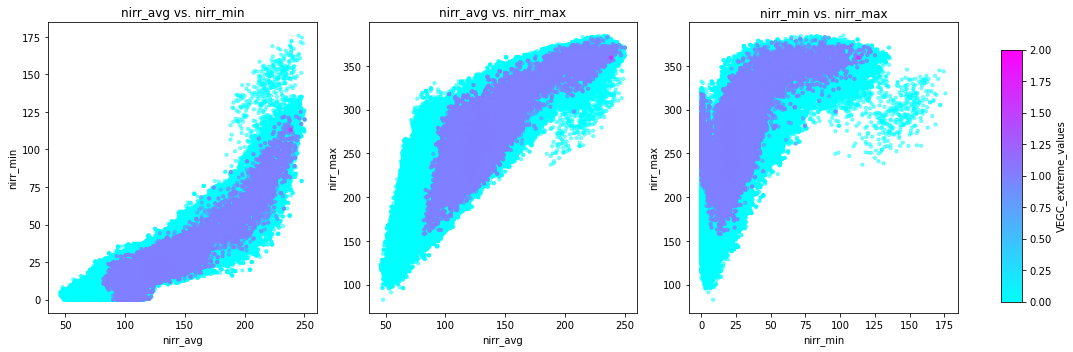

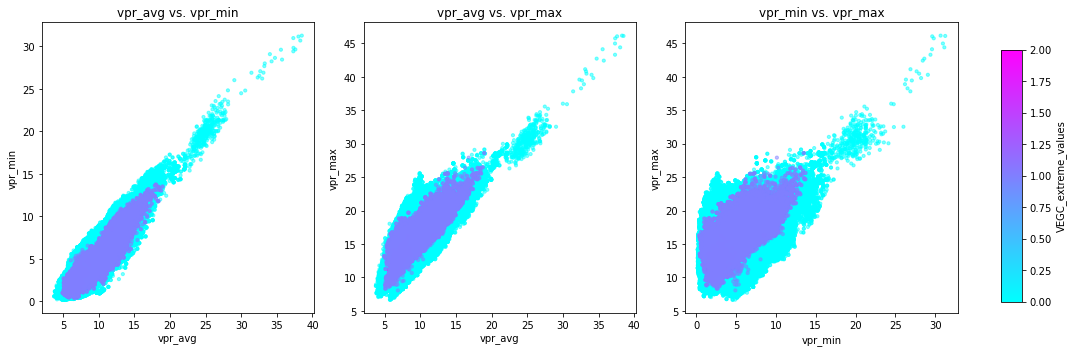

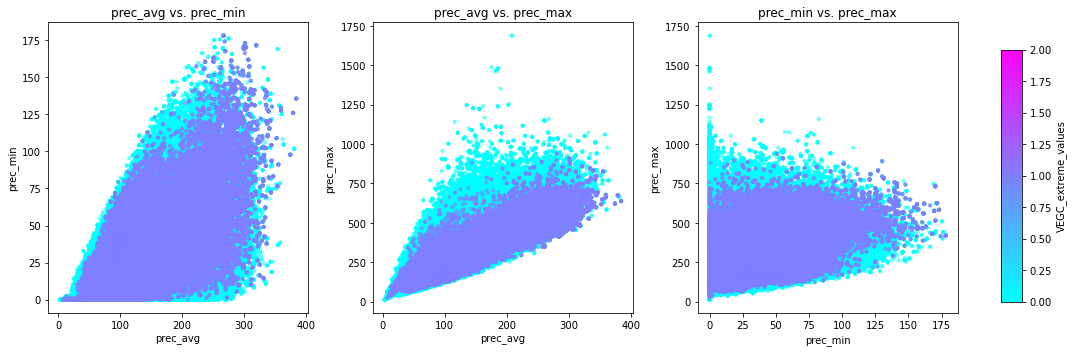

In [49]:
num_columns = 3  # Number of columns in subplot grid

for prefix in prefixes:
    columns = [col for col in downsampled_df.columns if col.startswith(prefix)]
    num_plots = len(columns) * (len(columns) - 1) // 2
    num_rows = (num_plots + num_columns - 1) // num_columns  # Calculate the number of required rows
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))  # Adjust the figure size if needed
    vegc_values = downsampled_df['extreme_values']
    norm = plt.Normalize(vegc_values.min(), vegc_values.max())
    sm = plt.cm.ScalarMappable(cmap='cool', norm=norm)
    sm.set_array([])
    
    # Flatten axes array for easy iteration if it's 2D (more than one column)
    axes = axes.flatten()
    plot_number = 0  # To keep track of which subplot we're filling

    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            ax = axes[plot_number]
            scatter = ax.scatter(
                downsampled_df[columns[i]],
                downsampled_df[columns[j]],
                c=vegc_values,
                cmap='cool',
                alpha=0.5,  # Transparency for better performance and readability
                s=10  # Point size
            )
            ax.set_title(f'{columns[i]} vs. {columns[j]}')
            ax.set_xlabel(columns[i])
            ax.set_ylabel(columns[j])
            plot_number += 1  # Move on to the next subplot
    
    # Add a colorbar to the last axis (or adjust according to your preference)
    cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])  # Adjust the position and size of the colorbar
    fig.colorbar(sm, cax=cbar_ax, label='VEGC_extreme_values')
    
    # Hide any unused subplots
    for i in range(plot_number, num_columns * num_rows):
        fig.delaxes(axes[i])
    
    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rectangle in which to fit the subplots
    plt.show()

/tmp/ipykernel_380706/1823623649.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rectangle in which to fit the subplots


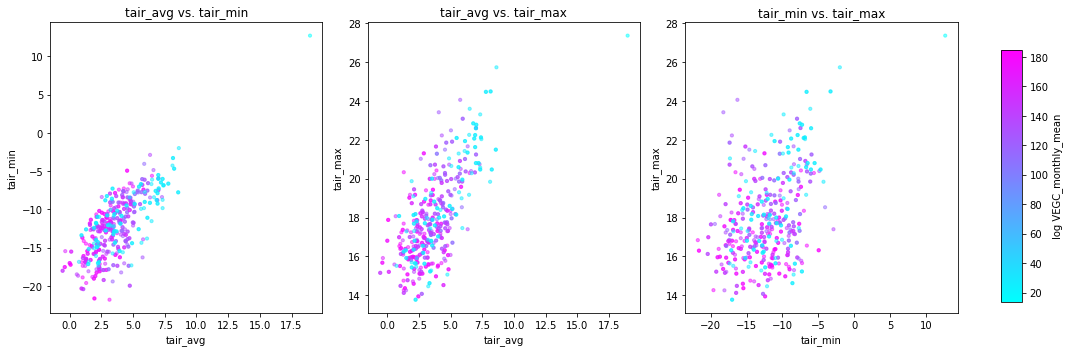

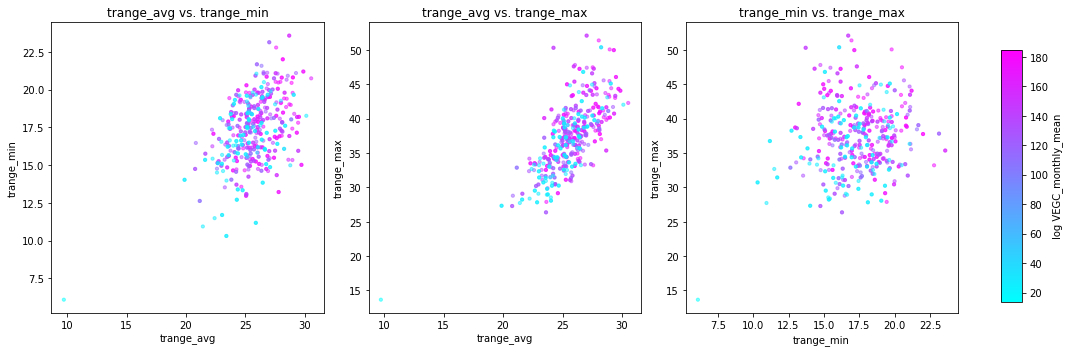

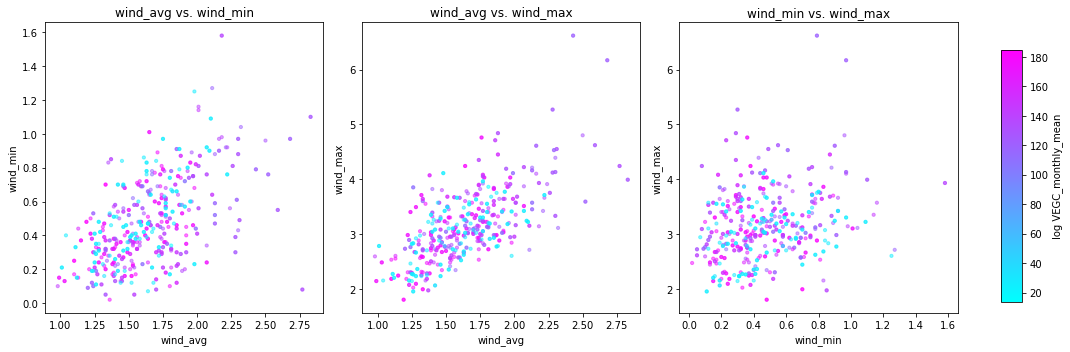

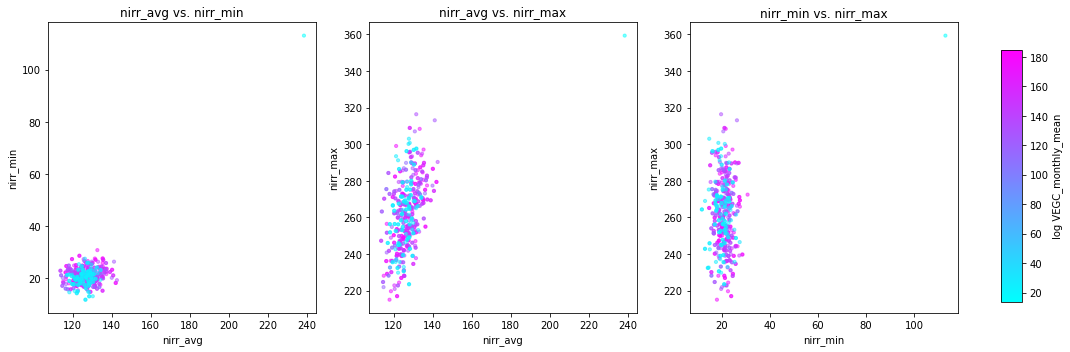

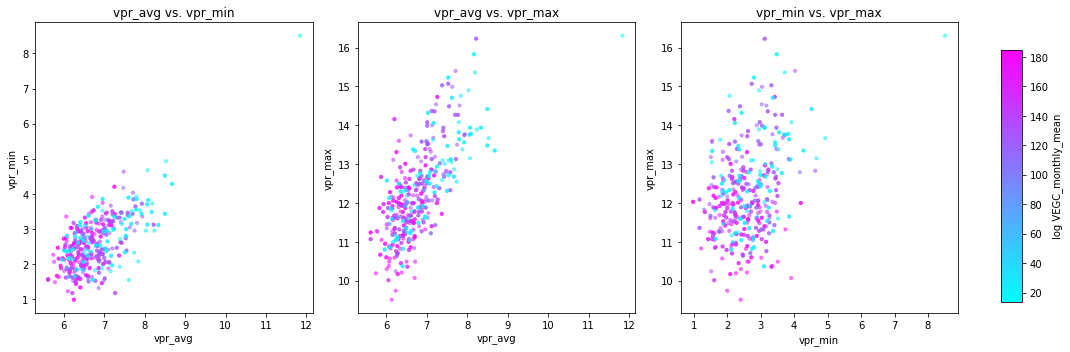

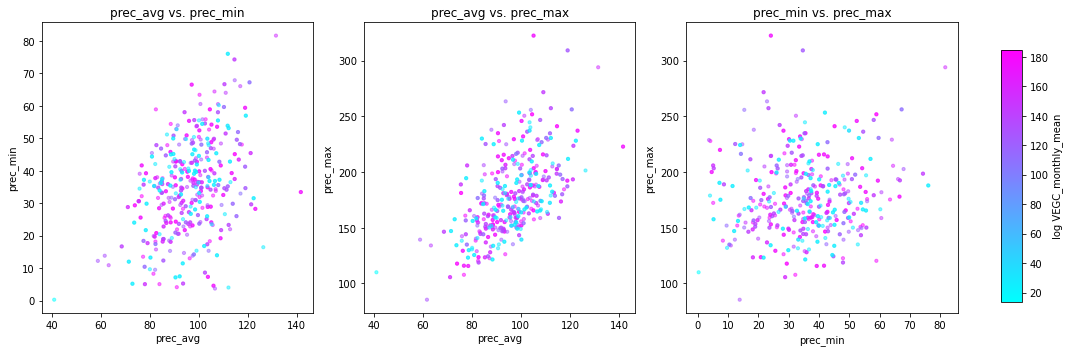

In [54]:
num_columns = 3  # Number of columns in subplot grid
high_only_df = downsampled_df.loc[downsampled_df['extreme_values']>1]
for prefix in prefixes:
    columns = [col for col in high_only_df.columns if col.startswith(prefix)]
    num_plots = len(columns) * (len(columns) - 1) // 2
    num_rows = (num_plots + num_columns - 1) // num_columns  # Calculate the number of required rows
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))  # Adjust the figure size if needed
    vegc_values = np.log(high_only_df['VEGC_monthly_mean'])
    norm = plt.Normalize(vegc_values.min(), vegc_values.max())
    sm = plt.cm.ScalarMappable(cmap='cool', norm=norm)
    sm.set_array([])
    
    # Flatten axes array for easy iteration if it's 2D (more than one column)
    axes = axes.flatten()
    plot_number = 0  # To keep track of which subplot we're filling

    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            ax = axes[plot_number]
            scatter = ax.scatter(
                high_only_df[columns[i]],
                high_only_df[columns[j]],
                c=vegc_values,
                cmap='cool',
                alpha=0.5,  # Transparency for better performance and readability
                s=10  # Point size
            )
            ax.set_title(f'{columns[i]} vs. {columns[j]}')
            ax.set_xlabel(columns[i])
            ax.set_ylabel(columns[j])
            plot_number += 1  # Move on to the next subplot
    
    # Add a colorbar to the last axis (or adjust according to your preference)
    cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])  # Adjust the position and size of the colorbar
    fig.colorbar(sm, cax=cbar_ax, label='log VEGC_monthly_mean')
    
    # Hide any unused subplots
    for i in range(plot_number, num_columns * num_rows):
        fig.delaxes(axes[i])
    
    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rectangle in which to fit the subplots
    plt.show()

/tmp/ipykernel_380706/997538746.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rectangle in which to fit the subplots


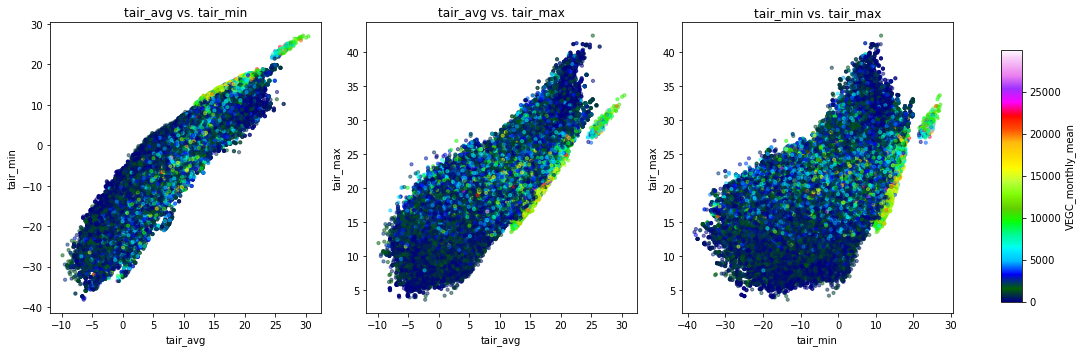

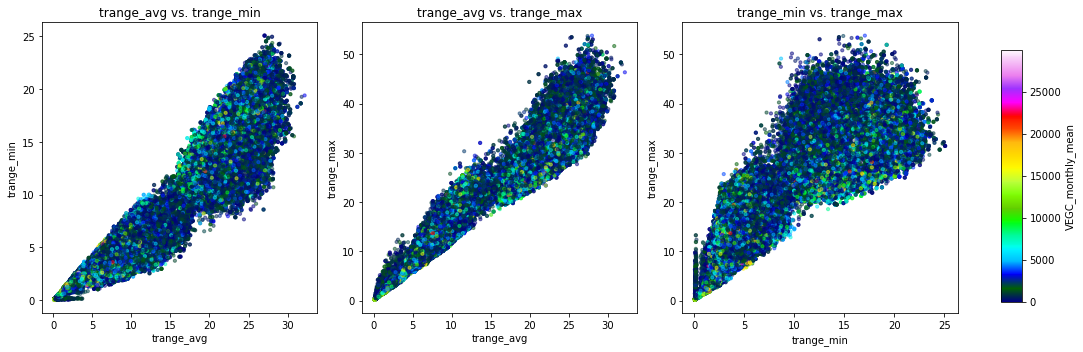

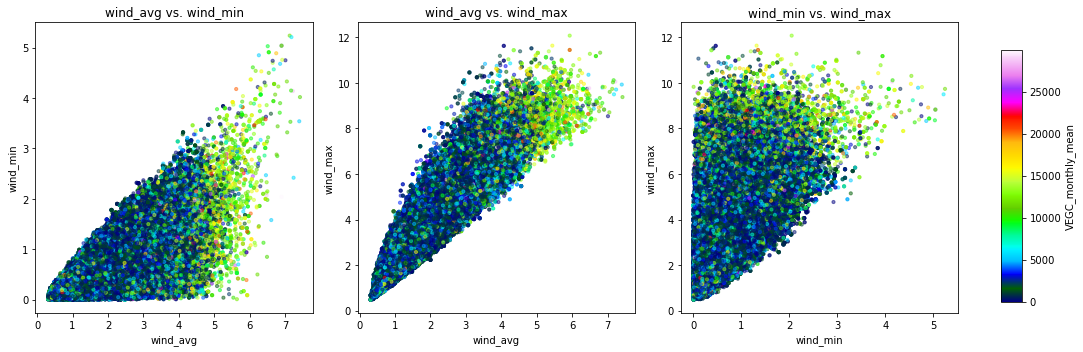

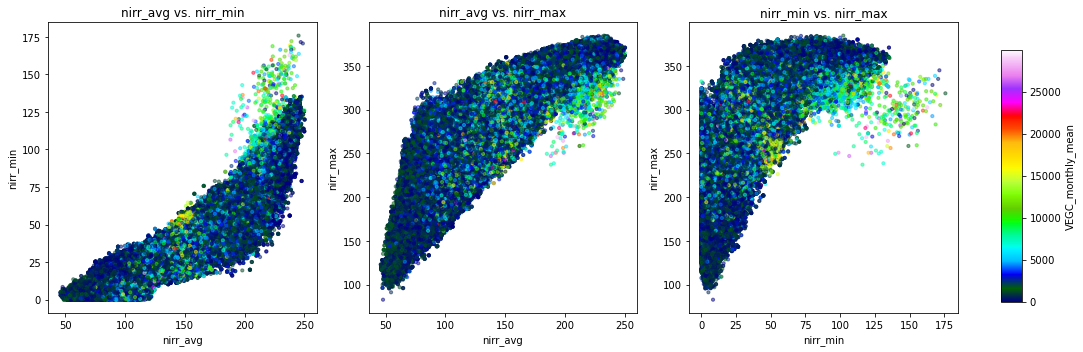

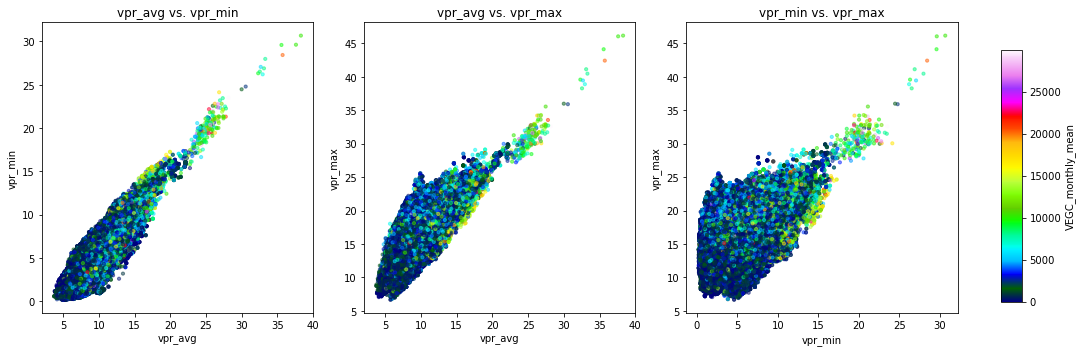

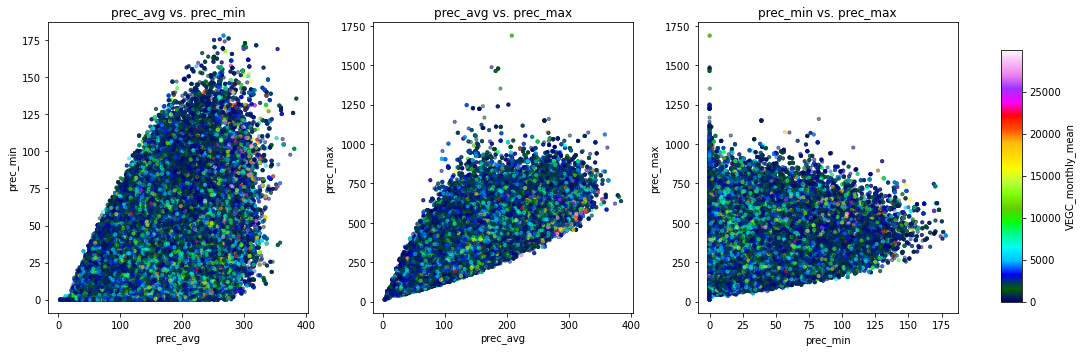

In [58]:
num_columns = 3  # Number of columns in subplot grid
high_only_df = downsampled_df.loc[downsampled_df['VEGC_monthly_mean']<=30000]
for prefix in prefixes:
    columns = [col for col in high_only_df.columns if col.startswith(prefix)]
    num_plots = len(columns) * (len(columns) - 1) // 2
    num_rows = (num_plots + num_columns - 1) // num_columns  # Calculate the number of required rows
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))  # Adjust the figure size if needed
    vegc_values = high_only_df['VEGC_monthly_mean']
    norm = plt.Normalize(vegc_values.min(), vegc_values.max())
    sm = plt.cm.ScalarMappable(cmap='gist_ncar', norm=norm)
    sm.set_array([])
    
    # Flatten axes array for easy iteration if it's 2D (more than one column)
    axes = axes.flatten()
    plot_number = 0  # To keep track of which subplot we're filling

    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            ax = axes[plot_number]
            scatter = ax.scatter(
                high_only_df[columns[i]],
                high_only_df[columns[j]],
                c=vegc_values,
                cmap='gist_ncar',
                alpha=0.5,  # Transparency for better performance and readability
                s=10  # Point size
            )
            ax.set_title(f'{columns[i]} vs. {columns[j]}')
            ax.set_xlabel(columns[i])
            ax.set_ylabel(columns[j])
            plot_number += 1  # Move on to the next subplot
    
    # Add a colorbar to the last axis (or adjust according to your preference)
    cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])  # Adjust the position and size of the colorbar
    fig.colorbar(sm, cax=cbar_ax, label='VEGC_monthly_mean')
    
    # Hide any unused subplots
    for i in range(plot_number, num_columns * num_rows):
        fig.delaxes(axes[i])
    
    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rectangle in which to fit the subplots
    plt.show()

/tmp/ipykernel_4188231/2457233806.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rectangle in which to fit the subplots


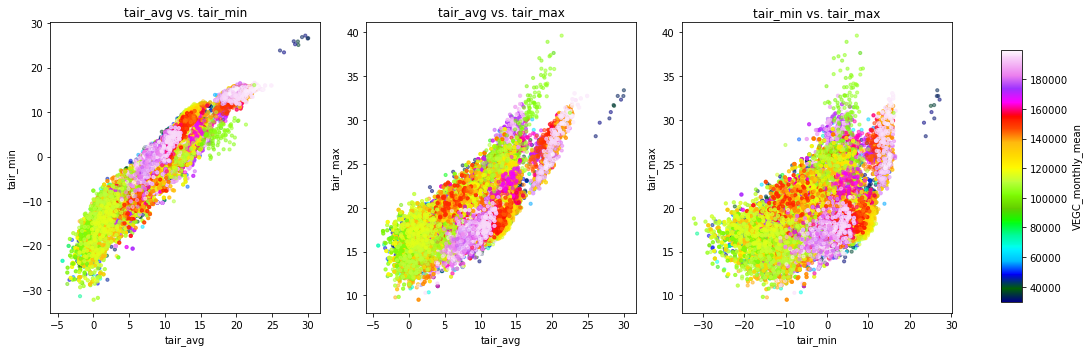

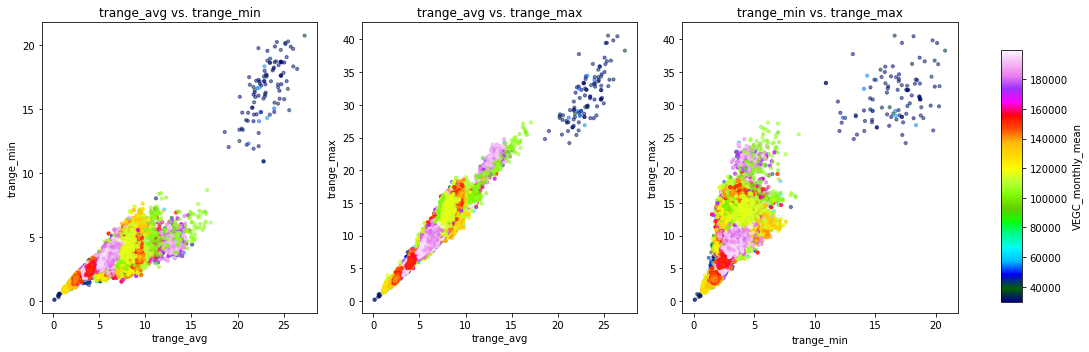

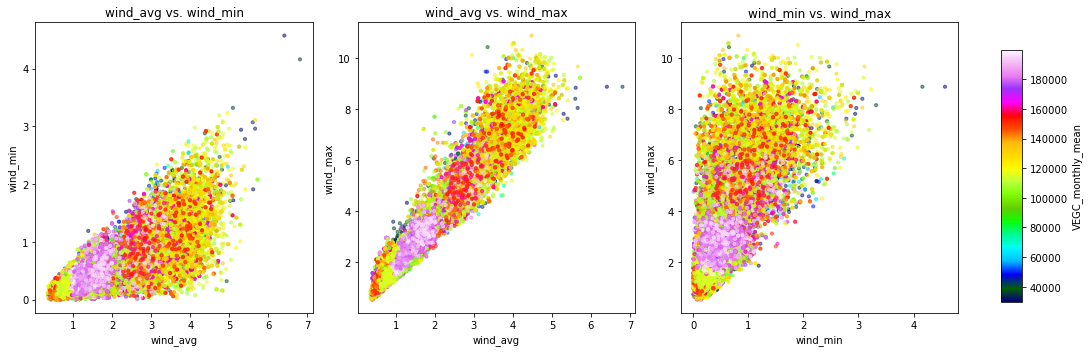

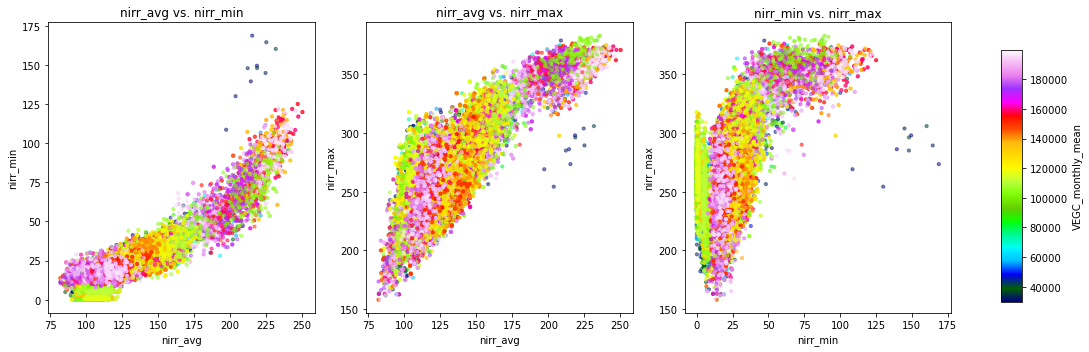

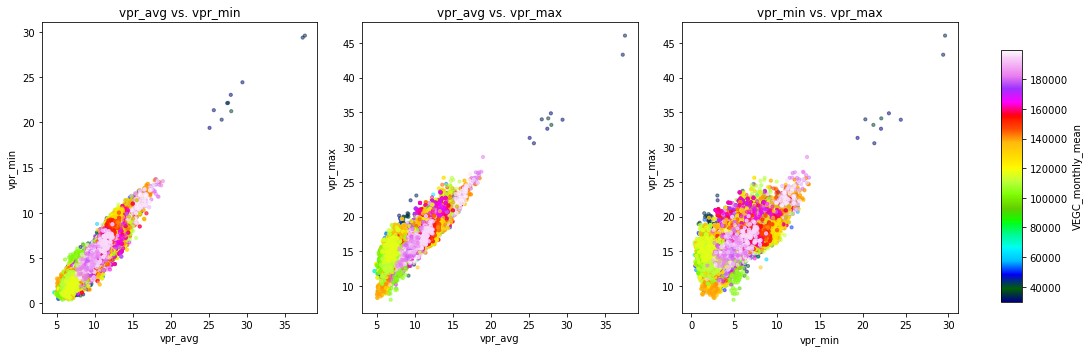

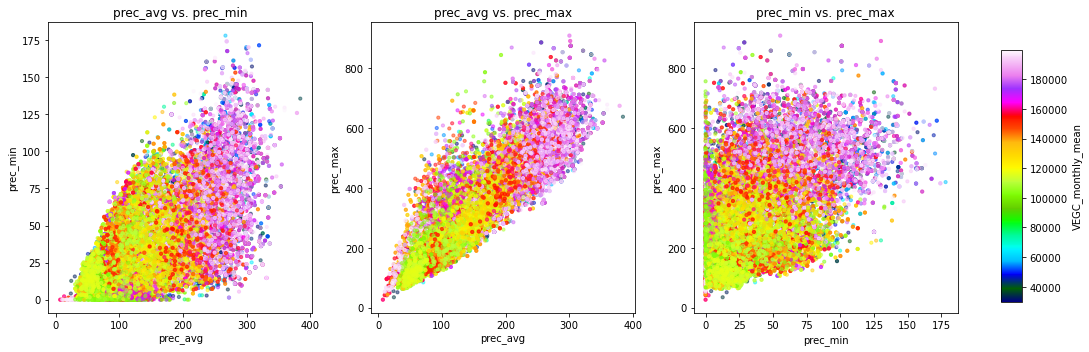

In [10]:
num_columns = 3  # Number of columns in subplot grid
high_only_df = downsampled_df.loc[downsampled_df['VEGC_monthly_mean'].between(30000, 200000)]
for prefix in prefixes:
    columns = [col for col in high_only_df.columns if col.startswith(prefix)]
    num_plots = len(columns) * (len(columns) - 1) // 2
    num_rows = (num_plots + num_columns - 1) // num_columns  # Calculate the number of required rows
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))  # Adjust the figure size if needed
    vegc_values = high_only_df['VEGC_monthly_mean']
    norm = plt.Normalize(vegc_values.min(), vegc_values.max())
    sm = plt.cm.ScalarMappable(cmap='gist_ncar', norm=norm)
    sm.set_array([])
    
    # Flatten axes array for easy iteration if it's 2D (more than one column)
    axes = axes.flatten()
    plot_number = 0  # To keep track of which subplot we're filling

    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            ax = axes[plot_number]
            scatter = ax.scatter(
                high_only_df[columns[i]],
                high_only_df[columns[j]],
                c=vegc_values,
                cmap='gist_ncar',
                alpha=0.5,  # Transparency for better performance and readability
                s=10  # Point size
            )
            ax.set_title(f'{columns[i]} vs. {columns[j]}')
            ax.set_xlabel(columns[i])
            ax.set_ylabel(columns[j])
            plot_number += 1  # Move on to the next subplot
    
    # Add a colorbar to the last axis (or adjust according to your preference)
    cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])  # Adjust the position and size of the colorbar
    fig.colorbar(sm, cax=cbar_ax, label='VEGC_monthly_mean')
    
    # Hide any unused subplots
    for i in range(plot_number, num_columns * num_rows):
        fig.delaxes(axes[i])
    
    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rectangle in which to fit the subplots
    plt.show()

/tmp/ipykernel_3312000/1457188021.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rectangle in which to fit the subplots


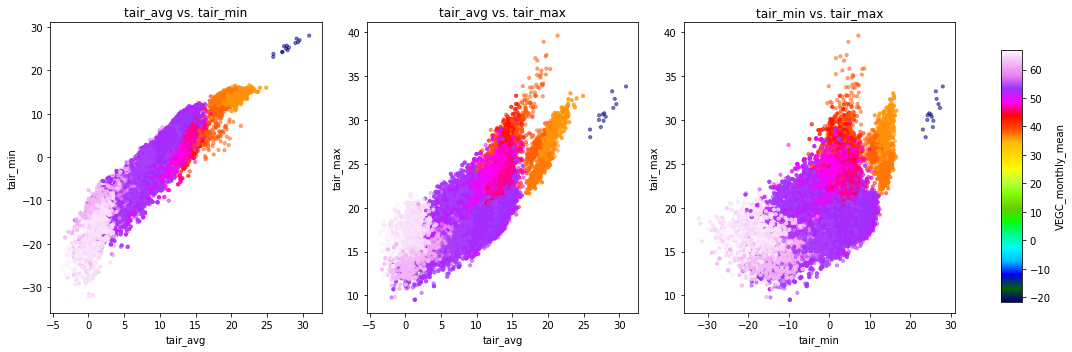

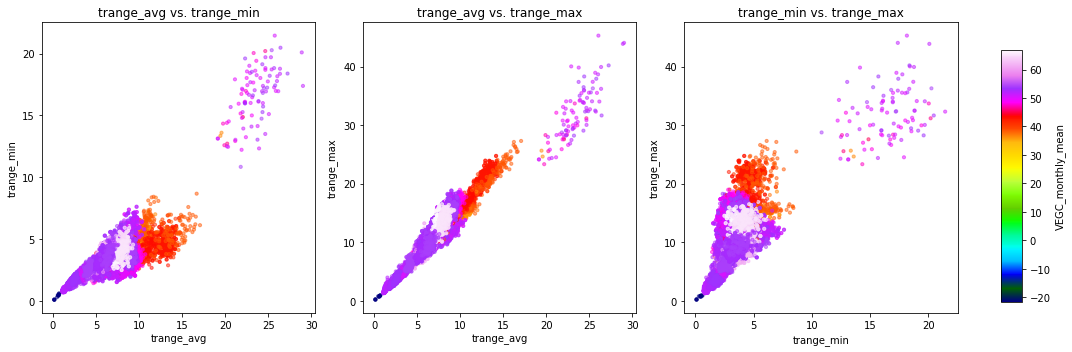

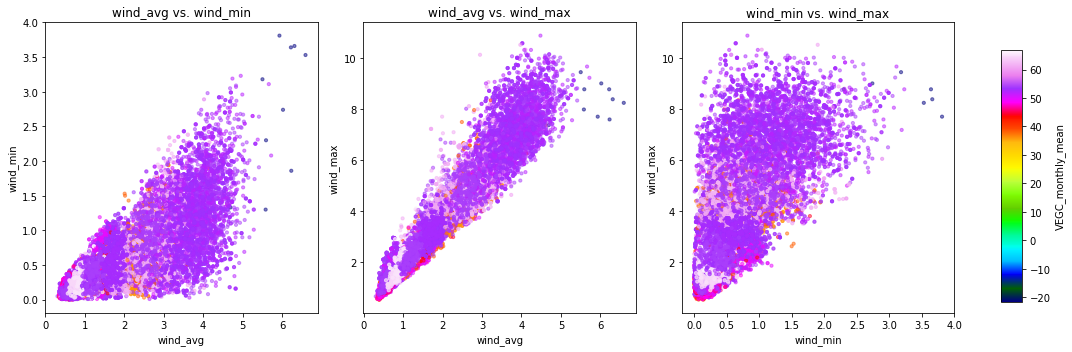

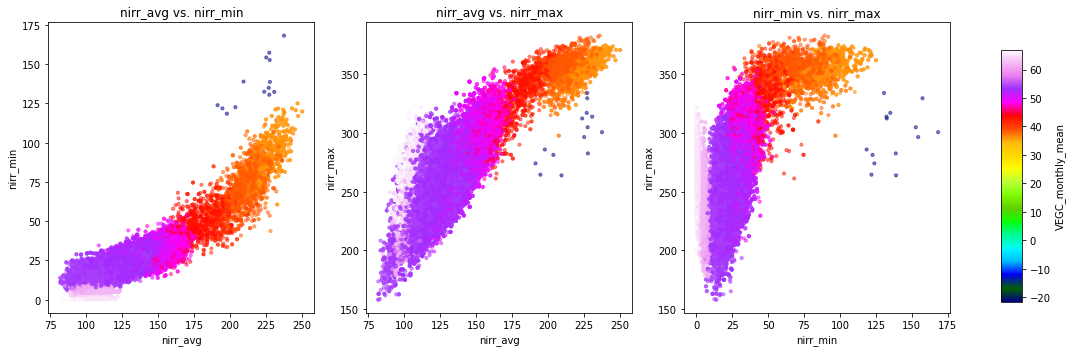

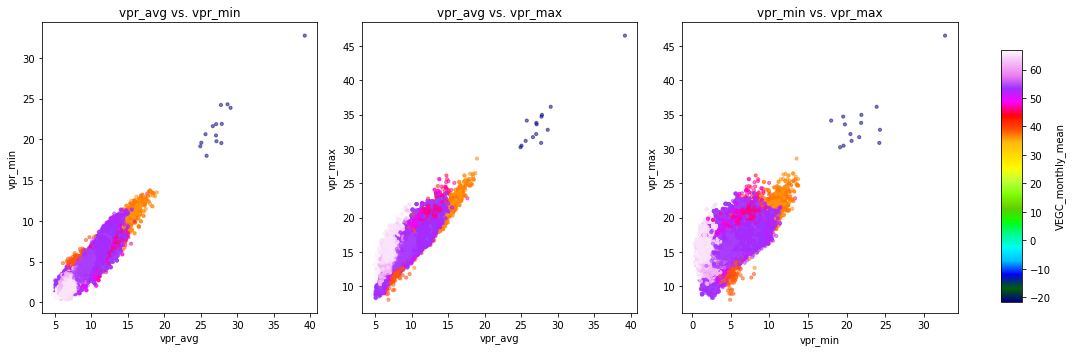

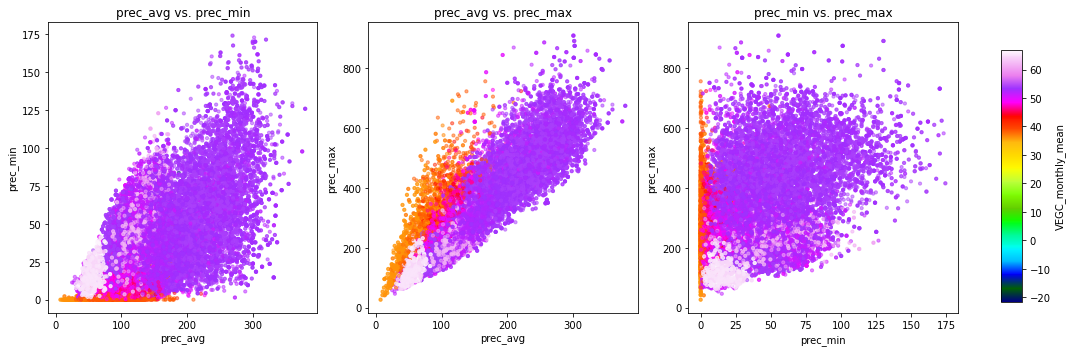

In [15]:
num_columns = 3  # Number of columns in subplot grid
high_only_df = downsampled_df.loc[downsampled_df['VEGC_monthly_mean'].between(30000, 200000)]
for prefix in prefixes:
    columns = [col for col in high_only_df.columns if col.startswith(prefix)]
    num_plots = len(columns) * (len(columns) - 1) // 2
    num_rows = (num_plots + num_columns - 1) // num_columns  # Calculate the number of required rows
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))  # Adjust the figure size if needed
    vegc_values = high_only_df['lat']
    norm = plt.Normalize(vegc_values.min(), vegc_values.max())
    sm = plt.cm.ScalarMappable(cmap='gist_ncar', norm=norm)
    sm.set_array([])
    
    # Flatten axes array for easy iteration if it's 2D (more than one column)
    axes = axes.flatten()
    plot_number = 0  # To keep track of which subplot we're filling

    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            ax = axes[plot_number]
            scatter = ax.scatter(
                high_only_df[columns[i]],
                high_only_df[columns[j]],
                c=vegc_values,
                cmap='gist_ncar',
                alpha=0.5,  # Transparency for better performance and readability
                s=10  # Point size
            )
            ax.set_title(f'{columns[i]} vs. {columns[j]}')
            ax.set_xlabel(columns[i])
            ax.set_ylabel(columns[j])
            plot_number += 1  # Move on to the next subplot
    
    # Add a colorbar to the last axis (or adjust according to your preference)
    cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])  # Adjust the position and size of the colorbar
    fig.colorbar(sm, cax=cbar_ax, label='VEGC_monthly_mean')
    
    # Hide any unused subplots
    for i in range(plot_number, num_columns * num_rows):
        fig.delaxes(axes[i])
    
    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the rectangle in which to fit the subplots
    plt.show()

In [19]:
clm_var.groupby(['model'])[['wind_min', 'wind_avg']].mean()

wind_min  wind_avg
model                                
AWIxxCMxx1xx1xxMR  0.473802  1.481710
BCCxxCSM2xxMR      0.746417  2.273740
CanESM5            0.636701  1.927250
MIROC6             0.219390  0.979369
MPIxxESM1xx2xxHR   0.475706  1.493671
MPIxxESM1xx2xxLR   0.636147  1.936633
MRIxxESM2xx0       0.485583  1.641629

In [15]:
check_wind[['lon', 'lat', 'year','coords','VEGC_monthly_mean','wind_min', 'wind_avg']]

lon   lat  year      coords  VEGC_monthly_mean  wind_min  wind_avg
0   -122.0  54.0  2015  -122.054.0       1.988852e+80      0.25      1.10
1   -122.0  54.0  2015  -122.054.0       1.720186e+80      0.25      1.10
2   -122.0  54.0  2016  -122.054.0       1.512379e+80      0.70      1.33
3   -122.0  54.0  2016  -122.054.0       1.226323e+80      0.70      1.33
4   -122.0  54.0  2017  -122.054.0       1.939135e+80      0.18      1.39
..     ...   ...   ...         ...                ...       ...       ...
548 -122.0  54.0  2099  -122.054.0       6.194936e+10      0.80      1.93
549 -122.0  54.0  2099  -122.054.0       5.860404e+10      0.80      1.93
550 -122.0  54.0  2100  -122.054.0       6.775711e+10      0.56      1.77
551 -122.0  54.0  2100  -122.054.0       5.860404e+10      0.56      1.77
552 -121.0  35.0  2022  -121.035.0       1.026156e+06      0.34      1.81

[553 rows x 7 columns]

In [17]:
tt = clm_var.loc[(clm_var['coords'].isin(check_wind['coords']))
            & (clm_var['year'].isin(check_wind['year']))
            & (~clm_var['model'].isin(check_wind['model']))]

tt[['lon', 'lat', 'year','coords','wind_min', 'wind_avg']]

lon   lat  year      coords  wind_min  wind_avg
47988   -122.0  54.0  2015  -122.054.0      0.47      1.39
47989   -122.0  54.0  2016  -122.054.0      0.40      1.69
47990   -122.0  54.0  2017  -122.054.0      0.29      1.31
47991   -122.0  54.0  2018  -122.054.0      0.34      1.18
47992   -122.0  54.0  2019  -122.054.0      0.61      1.53
...        ...   ...   ...         ...       ...       ...
1875225 -121.0  35.0  2096  -121.035.0      0.11      2.31
1875226 -121.0  35.0  2097  -121.035.0      0.62      2.43
1875227 -121.0  35.0  2098  -121.035.0      0.52      2.20
1875228 -121.0  35.0  2099  -121.035.0      0.38      2.00
1875229 -121.0  35.0  2100  -121.035.0      1.04      2.74

[3956 rows x 6 columns]

In [ ]:
tem_var_equil.columns[tem_var_equil.columns.str.contains('monthly_mean')]

In [6]:
tem_var_equil['AVAILN_monthly_mean_weight'] = tem_var_equil['AVAILN_monthly_mean'] * tem_var_equil['cohort_area']
tem_var_equil['GPP_monthly_mean_weight'] = tem_var_equil['GPP_monthly_mean'] * tem_var_equil['cohort_area']
tem_var_equil['LAI_monthly_mean_weight'] = tem_var_equil['LAI_monthly_mean'] * tem_var_equil['cohort_area']
tem_var_equil['NCE_monthly_mean_weight'] = tem_var_equil['NCE_monthly_mean'] * tem_var_equil['cohort_area']
tem_var_equil['NEP_monthly_mean_weight'] = tem_var_equil['NEP_monthly_mean'] * tem_var_equil['cohort_area']
tem_var_equil['NETNMIN_monthly_mean_weight'] = tem_var_equil['NETNMIN_monthly_mean'] * tem_var_equil['cohort_area']
tem_var_equil['NPP_monthly_mean_weight'] = tem_var_equil['NPP_monthly_mean'] * tem_var_equil['cohort_area']
tem_var_equil['SOILORGC_monthly_mean_weight'] = tem_var_equil['SOILORGC_monthly_mean'] * tem_var_equil['cohort_area']
tem_var_equil['VEGC_monthly_mean_weight'] = tem_var_equil['VEGC_monthly_mean'] * tem_var_equil['cohort_area']
tem_var_equil['VEGINNPP_monthly_mean_weight'] = tem_var_equil['VEGINNPP_monthly_mean'] * tem_var_equil['cohort_area']
tem_var_equil['VSM_monthly_mean_weight'] = tem_var_equil['VSM_monthly_mean'] * tem_var_equil['cohort_area']
tem_var_hist['AVAILN_monthly_mean_weight'] = tem_var_hist['AVAILN_monthly_mean'] * tem_var_hist['cohort_area']
tem_var_hist['GPP_monthly_mean_weight'] = tem_var_hist['GPP_monthly_mean'] * tem_var_hist['cohort_area']
tem_var_hist['LAI_monthly_mean_weight'] = tem_var_hist['LAI_monthly_mean'] * tem_var_hist['cohort_area']
tem_var_hist['NCE_monthly_mean_weight'] = tem_var_hist['NCE_monthly_mean'] * tem_var_hist['cohort_area']
tem_var_hist['NEP_monthly_mean_weight'] = tem_var_hist['NEP_monthly_mean'] * tem_var_hist['cohort_area']
tem_var_hist['NETNMIN_monthly_mean_weight'] = tem_var_hist['NETNMIN_monthly_mean'] * tem_var_hist['cohort_area']
tem_var_hist['NPP_monthly_mean_weight'] = tem_var_hist['NPP_monthly_mean'] * tem_var_hist['cohort_area']
tem_var_hist['SOILORGC_monthly_mean_weight'] = tem_var_hist['SOILORGC_monthly_mean'] * tem_var_hist['cohort_area']
tem_var_hist['VEGC_monthly_mean_weight'] = tem_var_hist['VEGC_monthly_mean'] * tem_var_hist['cohort_area']
tem_var_hist['VEGINNPP_monthly_mean_weight'] = tem_var_hist['VEGINNPP_monthly_mean'] * tem_var_hist['cohort_area']
tem_var_hist['VSM_monthly_mean_weight'] = tem_var_hist['VSM_monthly_mean'] * tem_var_hist['cohort_area']
tem_var['AVAILN_monthly_mean_weight'] = tem_var['AVAILN_monthly_mean'] * tem_var['cohort_area']
tem_var['GPP_monthly_mean_weight'] = tem_var['GPP_monthly_mean'] * tem_var['cohort_area']
tem_var['LAI_monthly_mean_weight'] = tem_var['LAI_monthly_mean'] * tem_var['cohort_area']
tem_var['NCE_monthly_mean_weight'] = tem_var['NCE_monthly_mean'] * tem_var['cohort_area']
tem_var['NEP_monthly_mean_weight'] = tem_var['NEP_monthly_mean'] * tem_var['cohort_area']
tem_var['NETNMIN_monthly_mean_weight'] = tem_var['NETNMIN_monthly_mean'] * tem_var['cohort_area']
tem_var['NPP_monthly_mean_weight'] = tem_var['NPP_monthly_mean'] * tem_var['cohort_area']
tem_var['SOILORGC_monthly_mean_weight'] = tem_var['SOILORGC_monthly_mean'] * tem_var['cohort_area']
tem_var['VEGC_monthly_mean_weight'] = tem_var['VEGC_monthly_mean'] * tem_var['cohort_area']
tem_var['VEGINNPP_monthly_mean_weight'] = tem_var['VEGINNPP_monthly_mean'] * tem_var['cohort_area']
tem_var['VSM_monthly_mean_weight'] = tem_var['VSM_monthly_mean'] * tem_var['cohort_area']


In [7]:
tem_var_equil_sum = tem_var_equil.groupby('forest_type')[[
    'VEGC_monthly_mean_weight','SOILORGC_monthly_mean_weight'
    ,'GPP_monthly_mean_weight','NPP_monthly_mean_weight','cohort_area']].sum()

tem_var_equil_sum['GPP_monthly_mean'] = tem_var_equil_sum['GPP_monthly_mean_weight'] / tem_var_equil_sum['cohort_area']
tem_var_equil_sum['NPP_monthly_mean'] = tem_var_equil_sum['NPP_monthly_mean_weight'] / tem_var_equil_sum['cohort_area']
tem_var_equil_sum['SOILORGC_monthly_mean'] = tem_var_equil_sum['SOILORGC_monthly_mean_weight'] / tem_var_equil_sum['cohort_area']
tem_var_equil_sum['VEGC_monthly_mean'] = tem_var_equil_sum['VEGC_monthly_mean_weight'] / tem_var_equil_sum['cohort_area']
tem_var_equil_sum[['VEGC_monthly_mean','SOILORGC_monthly_mean','GPP_monthly_mean','NPP_monthly_mean']]


VEGC_monthly_mean  \
forest_type                                                  
Boreal Forest                                  5034.800883   
Forested Boreal Wetlands                       4978.771116   
Mixed Temperate Forests                       14056.737135   
Temperate Broadleaved Evergreen Forests        2693.807082   
Temperate Coniferous Forests                  10483.341897   
Temperate Deciduous Forests                   11190.058558   
Tropical Evergreen Forests                    18849.076266   

                                         SOILORGC_monthly_mean  \
forest_type                                                      
Boreal Forest                                      9147.430142   
Forested Boreal Wetlands                           9854.812902   
Mixed Temperate Forests                            6745.114446   
Temperate Broadleaved Evergreen Forests            1334.951134   
Temperate Coniferous Forests                       9308.249167   
Temperate Deciduous Forests                        5189.014093   
Tropical Evergreen Forests                         7822.327150   

                                         GPP_monthly_mean  NPP_monthly_mean  
forest_type                                                                  
Boreal Forest                                   28.729859         11.596798  
Forested Boreal Wetlands                        29.058103         12.224792  
Mixed Temperate Forests                         91.100560         45.810703  
Temperate Broadleaved Evergreen Forests         35.475547         14.022120  
Temperate Coniferous Forests                    78.880131         42.381693  
Temperate Deciduous Forests                     69.880370         36.925703  
Tropical Evergreen Forests                     148.096103         71.419810

In [22]:
tem_var_equil.groupby('forest_type')[['VEGC_monthly_mean','SOILORGC_monthly_mean','GPP_monthly_mean','NPP_monthly_mean']].mean()

VEGC_monthly_mean  \
forest_type                                                  
Boreal Forest                                  4568.885644   
Forested Boreal Wetlands                       4982.089854   
Mixed Temperate Forests                       12971.358596   
Temperate Broadleaved Evergreen Forests        2869.502780   
Temperate Coniferous Forests                   9773.882629   
Temperate Deciduous Forests                   11205.091488   
Tropical Evergreen Forests                    17971.860319   

                                         SOILORGC_monthly_mean  \
forest_type                                                      
Boreal Forest                                      8958.691253   
Forested Boreal Wetlands                           9858.066357   
Mixed Temperate Forests                            6464.001900   
Temperate Broadleaved Evergreen Forests            1435.679195   
Temperate Coniferous Forests                       9038.481840   
Temperate Deciduous Forests                        5193.494501   
Tropical Evergreen Forests                         7494.571212   

                                         GPP_monthly_mean  NPP_monthly_mean  
forest_type                                                                  
Boreal Forest                                   27.254329         11.091478  
Forested Boreal Wetlands                        29.066276         12.229933  
Mixed Temperate Forests                         88.831572         43.771715  
Temperate Broadleaved Evergreen Forests         36.300555         13.734164  
Temperate Coniferous Forests                    76.065182         40.881174  
Temperate Deciduous Forests                     69.948470         36.960492  
Tropical Evergreen Forests                     142.449056         68.618818

In [8]:
tem_var_hist_sum = tem_var_hist.groupby('forest_type')[[
    'VEGC_monthly_mean_weight','SOILORGC_monthly_mean_weight'
    ,'GPP_monthly_mean_weight','NPP_monthly_mean_weight','cohort_area']].sum()

tem_var_hist_sum['GPP_monthly_mean'] = tem_var_hist_sum['GPP_monthly_mean_weight'] / tem_var_hist_sum['cohort_area']
tem_var_hist_sum['NPP_monthly_mean'] = tem_var_hist_sum['NPP_monthly_mean_weight'] / tem_var_hist_sum['cohort_area']
tem_var_hist_sum['SOILORGC_monthly_mean'] = tem_var_hist_sum['SOILORGC_monthly_mean_weight'] / tem_var_hist_sum['cohort_area']
tem_var_hist_sum['VEGC_monthly_mean'] = tem_var_hist_sum['VEGC_monthly_mean_weight'] / tem_var_hist_sum['cohort_area']
tem_var_hist_sum[['VEGC_monthly_mean','SOILORGC_monthly_mean','GPP_monthly_mean','NPP_monthly_mean']]


VEGC_monthly_mean  \
forest_type                                                  
Boreal Forest                                  5925.651555   
Forested Boreal Wetlands                       4796.903058   
Mixed Temperate Forests                        3179.612600   
Temperate Broadleaved Evergreen Forests        4577.746262   
Temperate Coniferous Forests                  11076.868919   
Temperate Deciduous Forests                    2738.163152   
Tropical Evergreen Forests                     2948.070699   

                                         SOILORGC_monthly_mean  \
forest_type                                                      
Boreal Forest                                      8509.338166   
Forested Boreal Wetlands                           9696.197925   
Mixed Temperate Forests                            2319.342145   
Temperate Broadleaved Evergreen Forests            2777.961325   
Temperate Coniferous Forests                       6841.814513   
Temperate Deciduous Forests                        2399.204352   
Tropical Evergreen Forests                         1627.391134   

                                         GPP_monthly_mean  NPP_monthly_mean  
forest_type                                                                  
Boreal Forest                                   23.604720          9.469472  
Forested Boreal Wetlands                        28.220097         11.733987  
Mixed Temperate Forests                         44.009218         21.407395  
Temperate Broadleaved Evergreen Forests         43.280605         17.233720  
Temperate Coniferous Forests                    34.097094         18.385817  
Temperate Deciduous Forests                     43.745038         23.294242  
Tropical Evergreen Forests                      82.996144         44.810714

In [13]:
tem_var_hist.groupby('forest_type')[['VEGC_monthly_mean','SOILORGC_monthly_mean','GPP_monthly_mean','NPP_monthly_mean']].mean()

VEGC_monthly_mean  \
forest_type                                                  
Boreal Forest                                  2026.024383   
Forested Boreal Wetlands                       4797.000600   
Mixed Temperate Forests                        2640.848277   
Temperate Broadleaved Evergreen Forests        1858.772705   
Temperate Coniferous Forests                   3234.696729   
Temperate Deciduous Forests                    2661.665593   
Tropical Evergreen Forests                     3017.890310   

                                         SOILORGC_monthly_mean  \
forest_type                                                      
Boreal Forest                                      8092.110284   
Forested Boreal Wetlands                           9675.401915   
Mixed Temperate Forests                            2342.667815   
Temperate Broadleaved Evergreen Forests            2306.328450   
Temperate Coniferous Forests                       6674.221766   
Temperate Deciduous Forests                        2625.918450   
Tropical Evergreen Forests                         1707.823596   

                                         GPP_monthly_mean  NPP_monthly_mean  
forest_type                                                                  
Boreal Forest                                   18.586568          7.350479  
Forested Boreal Wetlands                        28.280296         11.761252  
Mixed Temperate Forests                         41.055053         20.455856  
Temperate Broadleaved Evergreen Forests         28.710437          9.369824  
Temperate Coniferous Forests                    29.275091         15.998525  
Temperate Deciduous Forests                     46.793241         24.923567  
Tropical Evergreen Forests                      69.246683         35.608187

In [9]:
tem_var_plt_c = tem_var.loc[
    (tem_var['VEGC_monthly_mean']<100000)
    &(tem_var['SOILORGC_monthly_mean']<100000)
]

In [10]:
tem_var_sum = tem_var_plt_c.groupby('forest_type')[[
    'VEGC_monthly_mean_weight','SOILORGC_monthly_mean_weight'
    ,'GPP_monthly_mean_weight','NPP_monthly_mean_weight','cohort_area']].sum()

tem_var_sum['GPP_monthly_mean'] = tem_var_sum['GPP_monthly_mean_weight'] / tem_var_sum['cohort_area']
tem_var_sum['NPP_monthly_mean'] = tem_var_sum['NPP_monthly_mean_weight'] / tem_var_sum['cohort_area']
tem_var_sum['SOILORGC_monthly_mean'] = tem_var_sum['SOILORGC_monthly_mean_weight'] / tem_var_sum['cohort_area']
tem_var_sum['VEGC_monthly_mean'] = tem_var_sum['VEGC_monthly_mean_weight'] / tem_var_sum['cohort_area']
tem_var_sum[['VEGC_monthly_mean','SOILORGC_monthly_mean','GPP_monthly_mean','NPP_monthly_mean']]


VEGC_monthly_mean  \
forest_type                                                  
Boreal Forest                                  4923.925639   
Forested Boreal Wetlands                       6783.481677   
Mixed Temperate Forests                        2967.475885   
Temperate Broadleaved Evergreen Forests        4197.274876   
Temperate Coniferous Forests                   4802.096978   
Temperate Deciduous Forests                    2857.925614   
Tropical Evergreen Forests                     8665.822513   

                                         SOILORGC_monthly_mean  \
forest_type                                                      
Boreal Forest                                      9107.815511   
Forested Boreal Wetlands                          10513.925868   
Mixed Temperate Forests                            2057.016115   
Temperate Broadleaved Evergreen Forests            4620.604367   
Temperate Coniferous Forests                       6606.743854   
Temperate Deciduous Forests                        2592.834717   
Tropical Evergreen Forests                         3580.576117   

                                         GPP_monthly_mean  NPP_monthly_mean  
forest_type                                                                  
Boreal Forest                                   29.754116         10.987443  
Forested Boreal Wetlands                        31.476760         11.956138  
Mixed Temperate Forests                         42.589315         20.833728  
Temperate Broadleaved Evergreen Forests         50.908954         20.037909  
Temperate Coniferous Forests                    40.536764         21.215775  
Temperate Deciduous Forests                     56.356757         28.449071  
Tropical Evergreen Forests                     116.057586         54.633415

In [11]:
### compare periods 
tem_var_hist_sum = tem_var_hist.loc[tem_var_hist['year'].between(1975,2015)].groupby(
    ['forest_type', 'lon', 'lat'])[[
    'VEGC_monthly_mean_weight','SOILORGC_monthly_mean_weight'
    ,'GPP_monthly_mean_weight','NPP_monthly_mean_weight','cohort_area']].sum()

tem_var_hist_sum['GPP_monthly_mean_hist'] = tem_var_hist_sum['GPP_monthly_mean_weight'] / tem_var_hist_sum['cohort_area']
tem_var_hist_sum['NPP_monthly_mean_hist'] = tem_var_hist_sum['NPP_monthly_mean_weight'] / tem_var_hist_sum['cohort_area']
tem_var_hist_sum['SOILORGC_monthly_mean_hist'] = tem_var_hist_sum['SOILORGC_monthly_mean_weight'] / tem_var_hist_sum['cohort_area']
tem_var_hist_sum['VEGC_monthly_mean_hist'] = tem_var_hist_sum['VEGC_monthly_mean_weight'] / tem_var_hist_sum['cohort_area']
tem_var_hist_sum[['VEGC_monthly_mean_hist','SOILORGC_monthly_mean_hist','GPP_monthly_mean_hist','NPP_monthly_mean_hist']]

tem_var_hist_sum = tem_var_hist_sum.reset_index()

In [12]:
tem_var_sum = tem_var_plt_c.groupby(['forest_type', 'lat', 'lon'])[[
    'VEGC_monthly_mean_weight','SOILORGC_monthly_mean_weight'
    ,'GPP_monthly_mean_weight','NPP_monthly_mean_weight','cohort_area']].sum()

tem_var_sum['GPP_monthly_mean'] = tem_var_sum['GPP_monthly_mean_weight'] / tem_var_sum['cohort_area']
tem_var_sum['NPP_monthly_mean'] = tem_var_sum['NPP_monthly_mean_weight'] / tem_var_sum['cohort_area']
tem_var_sum['SOILORGC_monthly_mean'] = tem_var_sum['SOILORGC_monthly_mean_weight'] / tem_var_sum['cohort_area']
tem_var_sum['VEGC_monthly_mean'] = tem_var_sum['VEGC_monthly_mean_weight'] / tem_var_sum['cohort_area']
tem_var_sum[['VEGC_monthly_mean','SOILORGC_monthly_mean','GPP_monthly_mean','NPP_monthly_mean']]
tem_var_sum = tem_var_sum.reset_index()

In [43]:
tem_var_sum=tem_var_sum.merge(tem_var_hist_sum, on = ['forest_type', 'lon', 'lat'])

In [55]:
map_data = gp.GeoDataFrame(
    tem_var_sum, geometry=gp.points_from_xy(tem_var_sum.lon, tem_var_sum.lat)
    , crs="EPSG:4326"
)

map_data['VEGC_diff'] = map_data['VEGC_monthly_mean']/map_data['VEGC_monthly_mean_hist'] -1
map_data['NPP_diff'] = map_data['NPP_monthly_mean']/map_data['NPP_monthly_mean_hist'] -1


<Axes: xlabel='NPP_diff', ylabel='Count'>

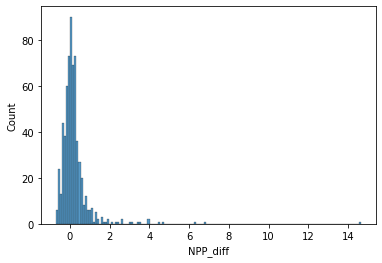

In [56]:
sns.histplot(map_data['NPP_diff'])

In [57]:
len(map_data.loc[map_data['VEGC_diff']<2])/len(map_data['VEGC_diff'])

0.8942457231726283

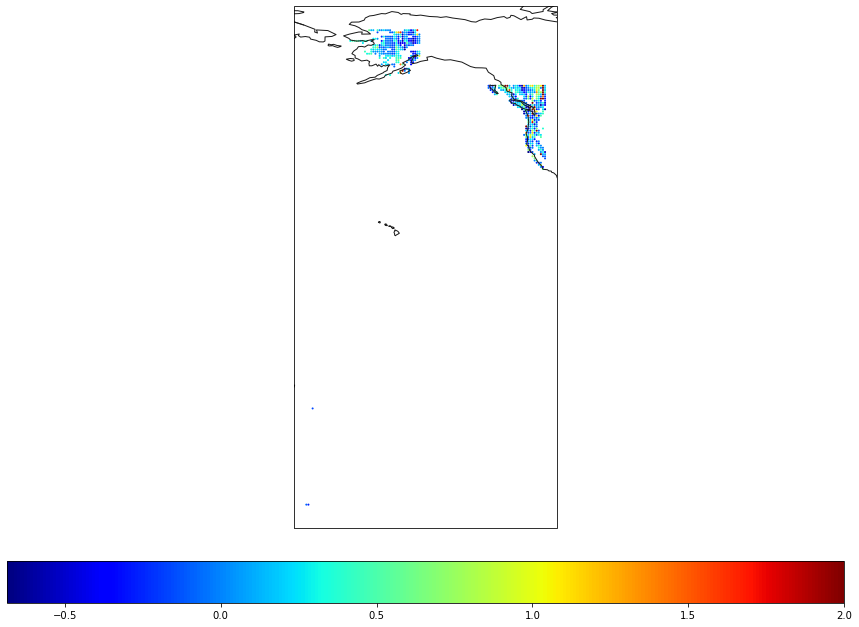

In [59]:

ig, axs = plt.subplots(nrows=1, ncols=1,figsize = (15, 12)
                      ,subplot_kw=dict(projection=ccrs.PlateCarree()))

axs.coastlines(color="0.1")
# axs[1].coastlines(color="0.1")


plot0 = map_data.plot(ax = axs
                                         ,cmap = 'jet'
                                         , column = 'NPP_diff', legend = True, 
                                         # vmin = 0,
                                      vmax = 2, 
                                                          markersize = 1,
                                        legend_kwds={ "location":"bottom" , "pad":0.05}
                                        )




In [13]:
tem_var_equil_sum_time = tem_var_equil.groupby(
    ['forest_type', 'year'])[[
    'VEGC_monthly_mean_weight','SOILORGC_monthly_mean_weight'
    ,'GPP_monthly_mean_weight','NPP_monthly_mean_weight','cohort_area']].sum()

tem_var_equil_sum_time['GPP_monthly_mean'] = tem_var_equil_sum_time['GPP_monthly_mean_weight'] / tem_var_equil_sum_time['cohort_area']
tem_var_equil_sum_time['NPP_monthly_mean'] = tem_var_equil_sum_time['NPP_monthly_mean_weight'] / tem_var_equil_sum_time['cohort_area']
tem_var_equil_sum_time['SOILORGC_monthly_mean'] = tem_var_equil_sum_time['SOILORGC_monthly_mean_weight'] / tem_var_equil_sum_time['cohort_area']
tem_var_equil_sum_time['VEGC_monthly_mean'] = tem_var_equil_sum_time['VEGC_monthly_mean_weight'] / tem_var_equil_sum_time['cohort_area']
# tem_var_equil_sum_time[['VEGC_monthly_mean','SOILORGC_monthly_mean_equil','GPP_monthly_mean_equil','NPP_monthly_mean_equil']]

tem_var_equil_sum_time = tem_var_equil_sum_time.reset_index()


### compare periods 
tem_var_hist_sum_time = tem_var_hist.groupby(
    ['forest_type', 'year'])[[
    'VEGC_monthly_mean_weight','SOILORGC_monthly_mean_weight'
    ,'GPP_monthly_mean_weight','NPP_monthly_mean_weight','cohort_area']].sum()

tem_var_hist_sum_time['GPP_monthly_mean'] = tem_var_hist_sum_time['GPP_monthly_mean_weight'] / tem_var_hist_sum_time['cohort_area']
tem_var_hist_sum_time['NPP_monthly_mean'] = tem_var_hist_sum_time['NPP_monthly_mean_weight'] / tem_var_hist_sum_time['cohort_area']
tem_var_hist_sum_time['SOILORGC_monthly_mean'] = tem_var_hist_sum_time['SOILORGC_monthly_mean_weight'] / tem_var_hist_sum_time['cohort_area']
tem_var_hist_sum_time['VEGC_monthly_mean'] = tem_var_hist_sum_time['VEGC_monthly_mean_weight'] / tem_var_hist_sum_time['cohort_area']
# tem_var_hist_sum_time[['VEGC_monthly_mean','SOILORGC_monthly_mean_hist','GPP_monthly_mean_hist','NPP_monthly_mean_hist']]

tem_var_hist_sum_time = tem_var_hist_sum_time.reset_index()

tem_var_sum_time = tem_var_plt_c.groupby(['forest_type', 'year'])[[
    'VEGC_monthly_mean_weight','SOILORGC_monthly_mean_weight'
    ,'GPP_monthly_mean_weight','NPP_monthly_mean_weight','cohort_area']].sum()

tem_var_sum_time['GPP_monthly_mean'] = tem_var_sum_time['GPP_monthly_mean_weight'] / tem_var_sum_time['cohort_area']
tem_var_sum_time['NPP_monthly_mean'] = tem_var_sum_time['NPP_monthly_mean_weight'] / tem_var_sum_time['cohort_area']
tem_var_sum_time['SOILORGC_monthly_mean'] = tem_var_sum_time['SOILORGC_monthly_mean_weight'] / tem_var_sum_time['cohort_area']
tem_var_sum_time['VEGC_monthly_mean'] = tem_var_sum_time['VEGC_monthly_mean_weight'] / tem_var_sum_time['cohort_area']
tem_var_sum_time[['VEGC_monthly_mean','SOILORGC_monthly_mean','GPP_monthly_mean','NPP_monthly_mean']]
tem_var_sum_time = tem_var_sum_time.reset_index()
tem_var_sum_time=pd.concat([tem_var_equil_sum_time,tem_var_hist_sum_time,tem_var_sum_time]).reset_index(drop=True)
# tem_var_sum_time['VEGC_diff'] = tem_var_sum_time['VEGC_monthly_mean']/tem_var_sum_time['VEGC_monthly_mean_hist'] -1
# tem_var_sum_time['NPP_diff'] = tem_var_sum_time['NPP_monthly_mean']/tem_var_sum_time['NPP_monthly_mean_hist'] -1


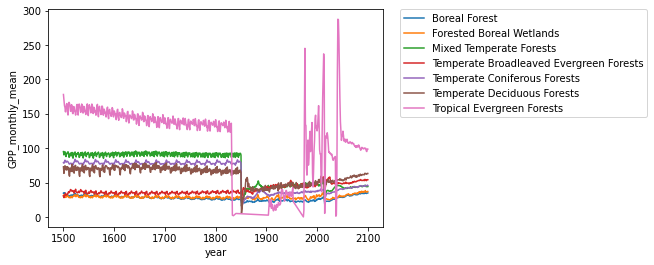

In [23]:
sns.lineplot(data = tem_var_sum_time, x = 'year', y = 'GPP_monthly_mean', hue = 'forest_type')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

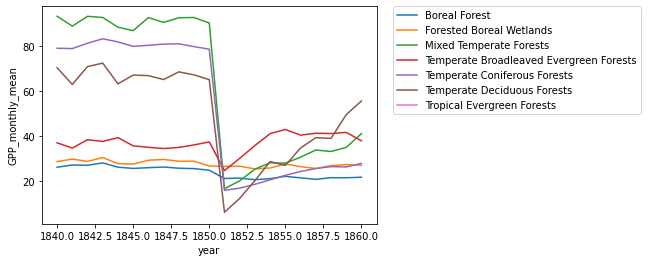

In [24]:
sns.lineplot(data = tem_var_sum_time.loc[tem_var_sum_time['year'].between(1840, 1860)], x = 'year', y = 'GPP_monthly_mean', hue = 'forest_type')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [21]:
tem_var_equil_time = tem_var_equil.groupby(
    ['forest_type', 'year', 'stand_age_interval_min'])[[
    'VEGC_monthly_mean_weight','SOILORGC_monthly_mean_weight'
    ,'GPP_monthly_mean_weight','NPP_monthly_mean_weight','cohort_area']].sum()

tem_var_equil_time['GPP_monthly_mean'] = tem_var_equil_time['GPP_monthly_mean_weight'] / tem_var_equil_time['cohort_area']
tem_var_equil_time['NPP_monthly_mean'] = tem_var_equil_time['NPP_monthly_mean_weight'] / tem_var_equil_time['cohort_area']
tem_var_equil_time['SOILORGC_monthly_mean'] = tem_var_equil_time['SOILORGC_monthly_mean_weight'] / tem_var_equil_time['cohort_area']
tem_var_equil_time['VEGC_monthly_mean'] = tem_var_equil_time['VEGC_monthly_mean_weight'] / tem_var_equil_time['cohort_area']
# tem_var_equil_time[['VEGC_monthly_mean','SOILORGC_monthly_mean_equil','GPP_monthly_mean_equil','NPP_monthly_mean_equil']]

tem_var_equil_time = tem_var_equil_time.reset_index()


### compare periods 
tem_var_hist_time = tem_var_hist.groupby(
    ['forest_type', 'year', 'stand_age_interval_min'])[[
    'VEGC_monthly_mean_weight','SOILORGC_monthly_mean_weight'
    ,'GPP_monthly_mean_weight','NPP_monthly_mean_weight','cohort_area']].sum()

tem_var_hist_time['GPP_monthly_mean'] = tem_var_hist_time['GPP_monthly_mean_weight'] / tem_var_hist_time['cohort_area']
tem_var_hist_time['NPP_monthly_mean'] = tem_var_hist_time['NPP_monthly_mean_weight'] / tem_var_hist_time['cohort_area']
tem_var_hist_time['SOILORGC_monthly_mean'] = tem_var_hist_time['SOILORGC_monthly_mean_weight'] / tem_var_hist_time['cohort_area']
tem_var_hist_time['VEGC_monthly_mean'] = tem_var_hist_time['VEGC_monthly_mean_weight'] / tem_var_hist_time['cohort_area']
# tem_var_hist_time[['VEGC_monthly_mean','SOILORGC_monthly_mean_hist','GPP_monthly_mean_hist','NPP_monthly_mean_hist']]

tem_var_hist_time = tem_var_hist_time.reset_index()

tem_var_time = tem_var_plt_c.groupby(['forest_type', 'year', 'stand_age_interval_min'])[[
    'VEGC_monthly_mean_weight','SOILORGC_monthly_mean_weight'
    ,'GPP_monthly_mean_weight','NPP_monthly_mean_weight','cohort_area']].sum()

tem_var_time['GPP_monthly_mean'] = tem_var_time['GPP_monthly_mean_weight'] / tem_var_time['cohort_area']
tem_var_time['NPP_monthly_mean'] = tem_var_time['NPP_monthly_mean_weight'] / tem_var_time['cohort_area']
tem_var_time['SOILORGC_monthly_mean'] = tem_var_time['SOILORGC_monthly_mean_weight'] / tem_var_time['cohort_area']
tem_var_time['VEGC_monthly_mean'] = tem_var_time['VEGC_monthly_mean_weight'] / tem_var_time['cohort_area']
tem_var_time[['VEGC_monthly_mean','SOILORGC_monthly_mean','GPP_monthly_mean','NPP_monthly_mean']]
tem_var_time = tem_var_time.reset_index()
tem_var_time=pd.concat([tem_var_equil_time,tem_var_hist_time,tem_var_time]).reset_index(drop=True)
# tem_var_time['VEGC_diff'] = tem_var_time['VEGC_monthly_mean']/tem_var_time['VEGC_monthly_mean_hist'] -1
# tem_var_time['NPP_diff'] = tem_var_time['NPP_monthly_mean']/tem_var_time['NPP_monthly_mean_hist'] -1


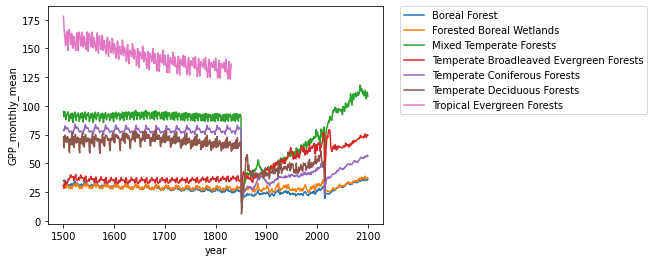

In [28]:
sns.lineplot(data = tem_var_time.loc[tem_var_time['stand_age_interval_min']==150], x = 'year', y = 'GPP_monthly_mean', hue = 'forest_type')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

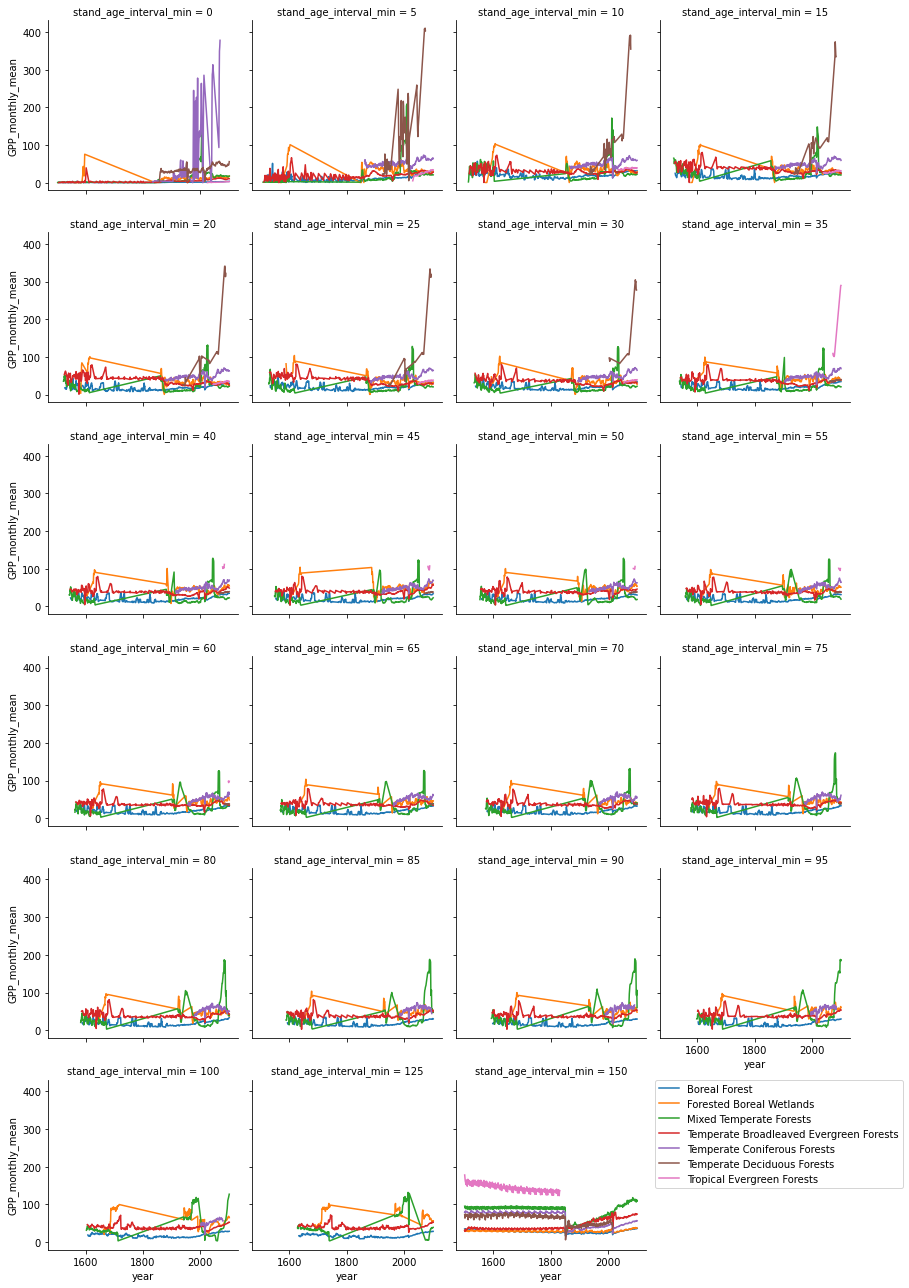

In [26]:

# Create FacetGrid
g = sns.FacetGrid(tem_var_time, col='stand_age_interval_min', col_wrap=4)

# Map lineplot to each facet
g.map(sns.lineplot, 'year', 'GPP_monthly_mean', 'forest_type')

# Adjust legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show plot
plt.show()


In [14]:

print(len(tem_var_plt_c)/len(tem_var))
tem_var_plt_c.groupby('forest_type')[['VEGC_monthly_mean','SOILORGC_monthly_mean','GPP_monthly_mean','NPP_monthly_mean']].mean()



0.978696901573832


VEGC_monthly_mean  \
forest_type                                                  
Boreal Forest                                  2143.287826   
Forested Boreal Wetlands                       2039.612822   
Mixed Temperate Forests                        2995.981458   
Temperate Broadleaved Evergreen Forests        3230.425970   
Temperate Coniferous Forests                   3567.700262   
Temperate Deciduous Forests                    2971.325577   
Tropical Evergreen Forests                    11248.128582   

                                         SOILORGC_monthly_mean  \
forest_type                                                      
Boreal Forest                                      9576.548660   
Forested Boreal Wetlands                           9790.245013   
Mixed Temperate Forests                            2278.400187   
Temperate Broadleaved Evergreen Forests            5045.442425   
Temperate Coniferous Forests                       7649.392040   
Temperate Deciduous Forests                        2629.447382   
Tropical Evergreen Forests                         4077.241164   

                                         GPP_monthly_mean  NPP_monthly_mean  
forest_type                                                                  
Boreal Forest                                   26.451492         10.057526  
Forested Boreal Wetlands                        30.259275         12.041139  
Mixed Temperate Forests                         43.733182         21.738792  
Temperate Broadleaved Evergreen Forests         51.277223         20.174006  
Temperate Coniferous Forests                    37.398914         19.818715  
Temperate Deciduous Forests                     56.001273         28.232494  
Tropical Evergreen Forests                     166.754269         81.653913

In [27]:
tem_var.forest_type.unique()

array(['Temperate Coniferous Forests', 'Boreal Forest',
       'Temperate Broadleaved Evergreen Forests',
       'Mixed Temperate Forests', 'Temperate Deciduous Forests',
       'Forested Boreal Wetlands', 'Tropical Evergreen Forests'],
      dtype=object)

In [35]:
# tem_var.groupby(['lat', 'lon', 'model'])['VEGC_monthly_mean'].std().reset_index().groupby('model')['VEGC_monthly_mean'].mean()

tem_var.loc[
tem_var['model']!='AWIxxCMxx1xx1xxMR'
].groupby(['lat', 'lon', 'model'])['VEGC_monthly_mean'].std().reset_index().groupby('model')['VEGC_monthly_mean'].mean()



model
BCCxxCSM2xxMR       1229.454151
CanESM5             1764.132799
MIROC6              8923.412008
MPIxxESM1xx2xxHR    3430.913692
MPIxxESM1xx2xxLR    1097.168068
MRIxxESM2xx0        6820.250762
Name: VEGC_monthly_mean, dtype: float64

In [34]:
tem_var.groupby(['lat', 'lon', 'scenario'])['VEGC_monthly_mean'].std().reset_index().groupby('scenario')['VEGC_monthly_mean'].mean()
tem_var.loc[
tem_var['model']!='AWIxxCMxx1xx1xxMR'
].groupby(['lat', 'lon', 'scenario'])['VEGC_monthly_mean'].std().reset_index().groupby('scenario')['VEGC_monthly_mean'].mean()


scenario
ssp126    5759.703235
ssp245    5048.571448
ssp370    7976.115895
ssp434    7211.963727
ssp460    6660.050487
ssp585    7617.607694
Name: VEGC_monthly_mean, dtype: float64

In [ ]:
###read in baseline values: 
###1500 post calibration
###1975 - 2000?
###include historical in training data?

In [33]:
clm_var.columns

Index(['lon', 'lat', 'Area', 'year', 'prec_avg', 'prec_min', 'prec_max',
       'nirr_avg', 'nirr_min', 'nirr_max', 'trange_avg', 'trange_min',
       'trange_max', 'wind_avg', 'wind_min', 'wind_max', 'tair_avg',
       'tair_min', 'tair_max', 'vpr_avg', 'vpr_min', 'vpr_max', 'model',
       'scenario'],
      dtype='object')

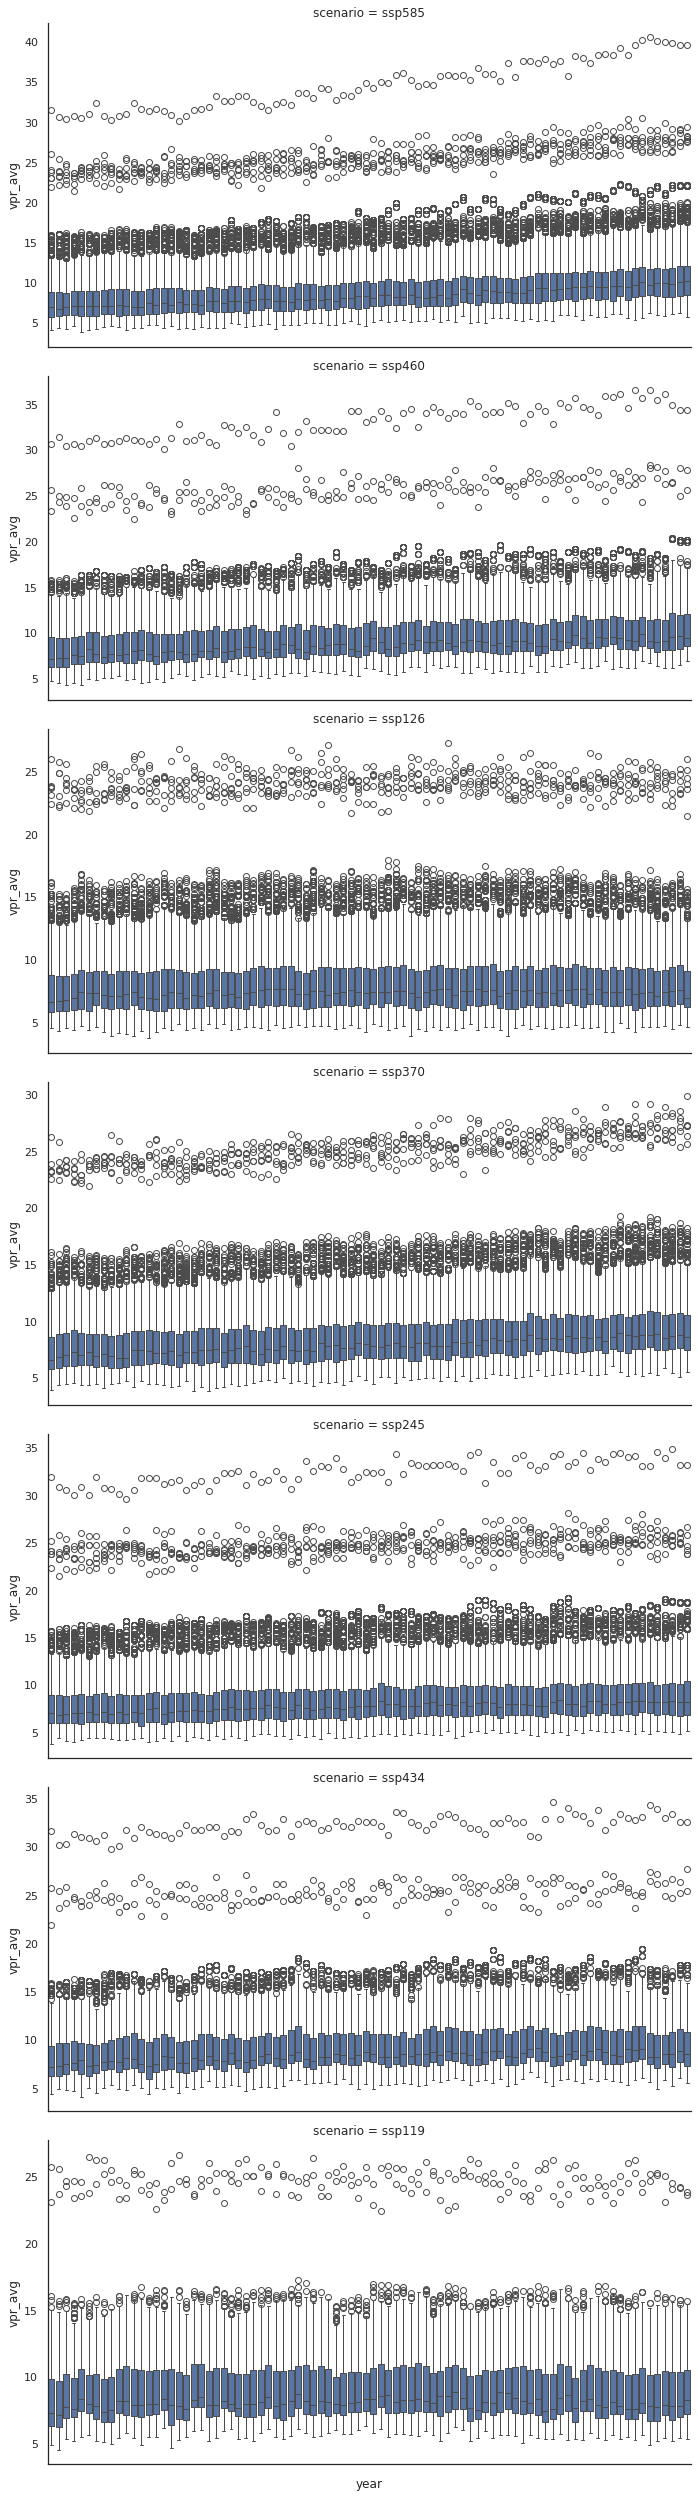

In [42]:
sns.set(style="white")

# Create the FacetGrid object with an adjusted aspect for a wider facet
# Added the aspect parameter to control the width.
g = sns.FacetGrid(clm_var, col="scenario", col_wrap=1, sharex=True, sharey=False, height=5, aspect=2)  # Adjust 'aspect' as needed

# Create the box plots.
# Added the 'order' parameter to ensure the years are ordered correctly.
g.map(sns.boxplot, 'year', 'vpr_avg', order=sorted(clm_var['year'].unique()))

# Rotate the x-axis labels for better readability and adjust the layout.
g.set_xticklabels(rotation=90)

# Show the plot
plt.show()
# Create the line plot using Seaborn's lineplot
# plt.figure(figsize=(14, 8))  # Adjust figure size if needed
# custom_palette = {' VEGC ': 'limegreen', ' SOILORGC ': 'darkgreen'}

# sns.boxplot(x='year', y='tair_avg', hue='scenario'
#                 # ,palette=custom_palette
#                 # , style = 'variable'
#              # , linewidth = 3
        
#              , data=clm_var)



In [11]:
tem_var.columns[tem_var.columns.str.contains('monthly_mean')]

Index(['AVAILN_monthly_mean', 'GPP_monthly_mean', 'LAI_monthly_mean',
       'NCE_monthly_mean', 'NEP_monthly_mean', 'NETNMIN_monthly_mean',
       'NPP_monthly_mean', 'SOILORGC_monthly_mean', 'VEGC_monthly_mean',
       'VEGINNPP_monthly_mean', 'VSM_monthly_mean'],
      dtype='object')

In [47]:
tem_var.loc[tem_var['VEGC_monthly_mean']>50000,tem_var.columns[tem_var.columns.str.contains('monthly_mean')]].describe()

AVAILN_monthly_mean  GPP_monthly_mean  LAI_monthly_mean  \
count         9.157000e+04      91570.000000      9.157000e+04   
mean         -1.833804e+79          7.570148      2.019527e+74   
std           5.327272e+80          4.286403      1.915536e+76   
min          -2.244281e+82          0.000000      1.000000e-02   
25%           0.000000e+00          2.650000      6.000000e-02   
50%           0.000000e+00          8.270000      1.600000e-01   
75%           0.000000e+00         10.530000      2.000000e-01   
max           1.416507e+77         77.090000      2.724726e+78   

       NCE_monthly_mean  NEP_monthly_mean  NETNMIN_monthly_mean  \
count      9.157000e+04      9.157000e+04          9.157000e+04   
mean      -3.002131e+74     -3.002131e+74          4.235834e+75   
std        4.019260e+76      4.019260e+76          8.991776e+77   
min       -8.686442e+78     -8.686442e+78         -6.447000e+01   
25%        1.950000e+00      1.950000e+00          0.000000e+00   
50%        6.830000e+00      6.830000e+00          0.000000e+00   
75%        8.690000e+00      8.690000e+00          0.000000e+00   
max        1.877000e+01      1.877000e+01          2.113529e+80   

       NPP_monthly_mean  SOILORGC_monthly_mean  VEGC_monthly_mean  \
count      9.157000e+04           9.157000e+04       9.157000e+04   
mean      -2.924629e+74           2.314899e+77       1.474180e+76   
std        4.012257e+76           6.285360e+78       1.398202e+78   
min       -8.684350e+78           5.779990e+03       5.000123e+04   
25%        1.950000e+00           3.536973e+04       6.824744e+04   
50%        6.840000e+00           4.479768e+04       1.103358e+05   
75%        8.710000e+00           5.668104e+04       1.824456e+05   
max        2.694000e+01           2.452956e+80       1.988852e+80   

       VEGINNPP_monthly_mean  VSM_monthly_mean  
count           9.157000e+04      91570.000000  
mean           -2.924629e+74         10.492807  
std             4.012257e+76         11.690731  
min            -8.684350e+78          0.000000  
25%             1.970000e+00          0.000000  
50%             6.860000e+00          0.000000  
75%             8.730000e+00         21.050000  
max             1.229800e+02         31.980000

In [49]:
tem_var.loc[tem_var['VEGC_monthly_mean']<=30000,tem_var.columns[tem_var.columns.str.contains('monthly_mean')]].describe()

AVAILN_monthly_mean  GPP_monthly_mean  LAI_monthly_mean  \
count         2.095570e+07      2.095570e+07      2.095570e+07   
mean         -6.122833e+05      3.362335e+01      1.521783e+00   
std           3.613266e+07      3.668879e+01      1.392133e+00   
min          -1.795193e+10      0.000000e+00      0.000000e+00   
25%           2.628100e+02      7.520000e+00      2.400000e-01   
50%           4.963300e+02      2.248000e+01      1.220000e+00   
75%           1.101320e+03      4.645000e+01      2.330000e+00   
max           1.863042e+06      6.772200e+02      4.536000e+01   

       NCE_monthly_mean  NEP_monthly_mean  NETNMIN_monthly_mean  \
count      2.095570e+07      2.095570e+07          2.095570e+07   
mean       1.755046e+00      3.646376e+00          2.130694e+02   
std        1.713097e+01      1.466073e+01          6.323910e+02   
min       -3.385170e+04     -3.385170e+04         -1.815954e+05   
25%       -1.710000e+00     -1.020000e+00          6.686000e+01   
50%        1.350000e+00      1.670000e+00          1.557500e+02   
75%        5.290000e+00      6.310000e+00          2.922300e+02   
max        3.142800e+02      3.190700e+02          2.241296e+06   

       NPP_monthly_mean  SOILORGC_monthly_mean  VEGC_monthly_mean  \
count      2.095570e+07           2.095570e+07       2.095570e+07   
mean       1.593491e+01           9.654994e+03       2.735319e+03   
std        1.966904e+01           2.829053e+04       3.695360e+03   
min       -6.529780e+03           0.000000e+00       0.000000e+00   
25%        2.660000e+00           1.468250e+03       4.507700e+02   
50%        9.940000e+00           3.361330e+03       1.399050e+03   
75%        2.097000e+01           7.375180e+03       3.421440e+03   
max        4.026600e+02           1.186623e+06       2.999993e+04   

       VEGINNPP_monthly_mean  VSM_monthly_mean  
count           2.095570e+07      2.095570e+07  
mean            3.745637e+01      2.360420e+01  
std             3.344391e+01      9.005141e+00  
min            -6.529780e+03      0.000000e+00  
25%             8.670000e+00      2.102000e+01  
50%             3.298000e+01      2.516000e+01  
75%             5.489000e+01      2.988000e+01  
max             4.026600e+02      4.347000e+01

In [53]:
tem_var.loc[tem_var['GPP_monthly_mean']>600]

model scenario  grid_group    lon   lat  \
2819807   AWIxxCMxx1xx1xxMR   ssp585           0 -175.5 -21.5   
4978179       BCCxxCSM2xxMR   ssp585           0 -175.5 -21.5   
7210535              MIROC6   ssp370           0 -175.5 -21.5   
7210538              MIROC6   ssp370           0 -175.5 -21.5   
8043558              MIROC6   ssp585           0 -175.5 -21.5   
8043562              MIROC6   ssp585           0 -175.5 -21.5   
8043568              MIROC6   ssp585           0 -175.5 -21.5   
8043571              MIROC6   ssp585           0 -175.5 -21.5   
20788601            CanESM5   ssp585           0 -175.5 -21.5   
20788605            CanESM5   ssp585           0 -175.5 -21.5   
20788609            CanESM5   ssp585           0 -175.5 -21.5   
20788612            CanESM5   ssp585           0 -175.5 -21.5   
20788615            CanESM5   ssp585           0 -175.5 -21.5   
20788618            CanESM5   ssp585           0 -175.5 -21.5   
20788622            CanESM5   ssp585           0 -175.5 -21.5   
20788626            CanESM5   ssp585           0 -175.5 -21.5   

                         forest_type  current_veg  year  silt_clay  \
2819807   Tropical Evergreen Forests           16  2075       14.0   
4978179   Tropical Evergreen Forests           16  2076       14.0   
7210535   Tropical Evergreen Forests           16  2071       14.0   
7210538   Tropical Evergreen Forests           16  2072       14.0   
8043558   Tropical Evergreen Forests           16  2068       14.0   
8043562   Tropical Evergreen Forests           16  2069       14.0   
8043568   Tropical Evergreen Forests           16  2071       14.0   
8043571   Tropical Evergreen Forests           16  2072       14.0   
20788601  Tropical Evergreen Forests           16  2067       14.0   
20788605  Tropical Evergreen Forests           16  2068       14.0   
20788609  Tropical Evergreen Forests           16  2069       14.0   
20788612  Tropical Evergreen Forests           16  2070       14.0   
20788615  Tropical Evergreen Forests           16  2071       14.0   
20788618  Tropical Evergreen Forests           16  2072       14.0   
20788622  Tropical Evergreen Forests           16  2073       14.0   
20788626  Tropical Evergreen Forests           16  2074       14.0   

          stand_age_interval_min  ...  SOILORGC_cohort_annual_change_percent  \
2819807                       10  ...                                   0.06   
4978179                       10  ...                                   0.05   
7210535                        5  ...                                   0.02   
7210538                        5  ...                                   0.06   
8043558                        0  ...                                  -0.07   
8043562                        5  ...                                  -0.02   
8043568                        5  ...                                   0.02   
8043571                        5  ...                                   0.04   
20788601                       0  ...                                  -0.13   
20788605                       0  ...                                  -0.09   
20788609                       5  ...                                  -0.02   
20788612                       5  ...                                   0.03   
20788615                       5  ...                                   0.05   
20788618                       5  ...                                   0.05   
20788622                       5  ...                                   0.05   
20788626                      10  ...                                   0.04   

          VEGC_monthly_mean  VEGC_cohort_annual_change_delta  \
2819807            26272.24                          2247.99   
4978179            25550.40                          2087.24   
7210535            21084.77                          2616.35   
7210538            23229.18                          2144.41   
8043558            16404.54                 

In [54]:
tem_var_plt=tem_var.loc[tem_var['VEGC_monthly_mean']<=30000]

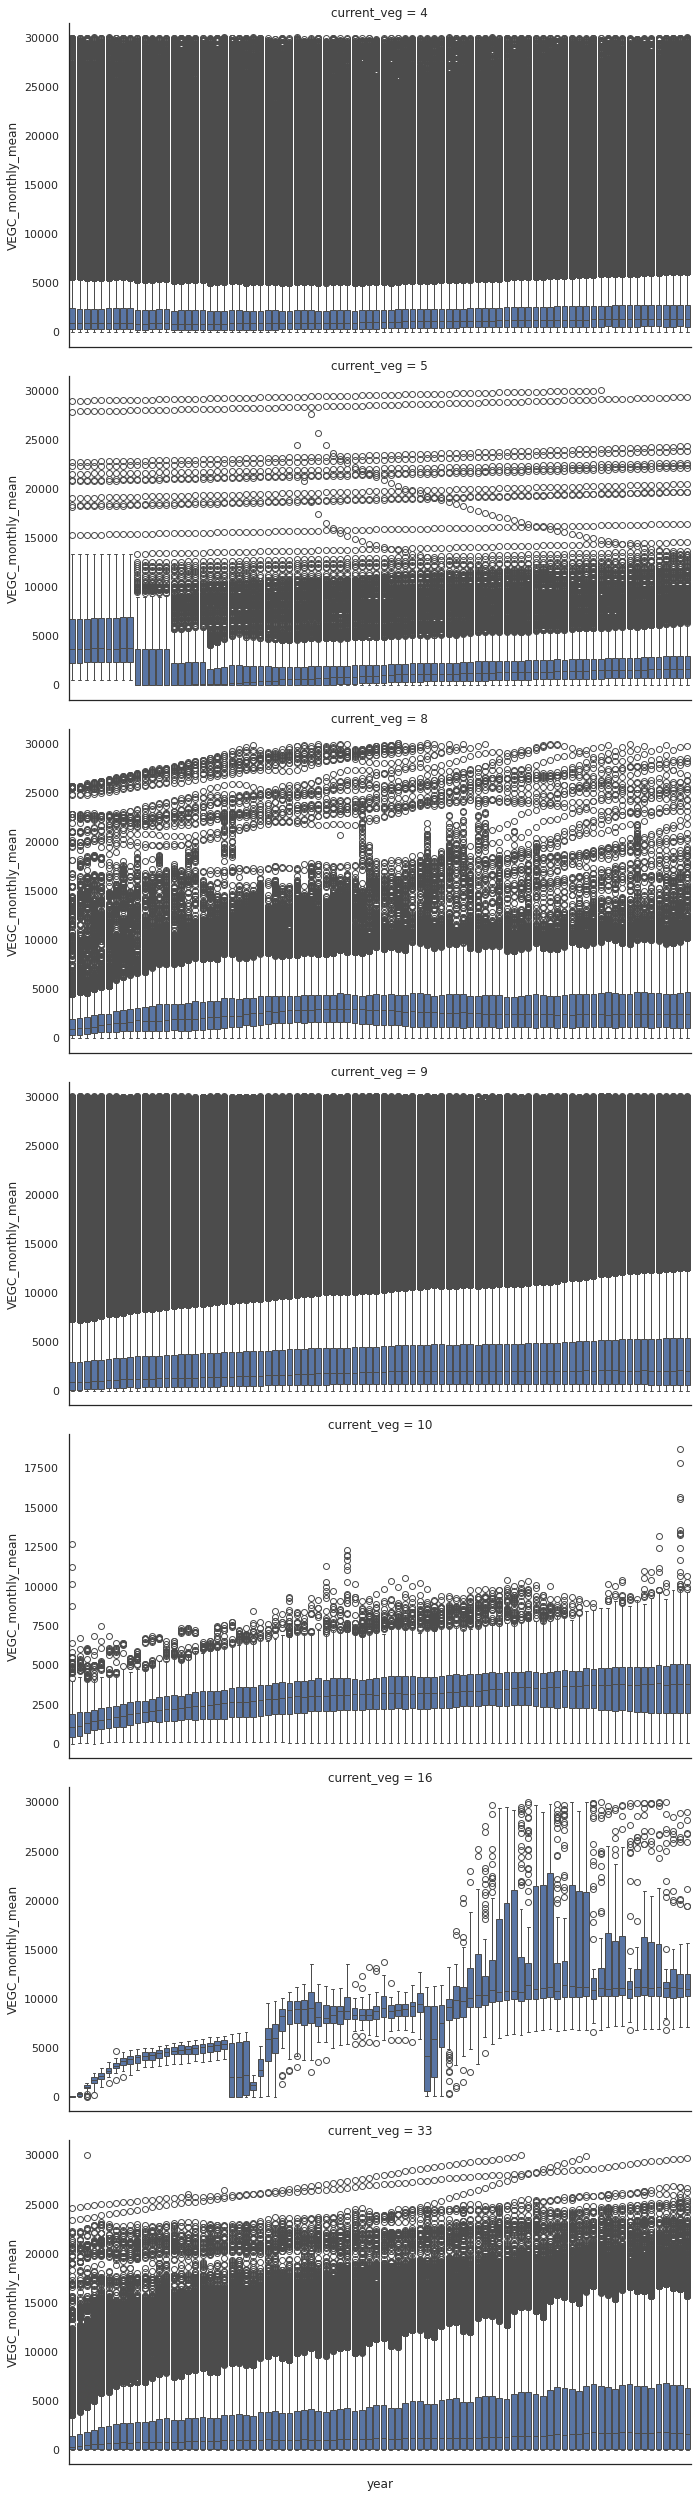

In [56]:
sns.set(style="white")

# Create the FacetGrid object with an adjusted aspect for a wider facet
# Added the aspect parameter to control the width.
g = sns.FacetGrid(tem_var_plt, col="current_veg", col_wrap=1, sharex=True, sharey=False, height=5, aspect=2)  # Adjust 'aspect' as needed

# Create the box plots.
# Added the 'order' parameter to ensure the dxc c correctly.
g.map(sns.boxplot, 'year', 'VEGC_monthly_mean', order=sorted(tem_var_plt['year'].unique()))

# Rotate the x-axis labels for better readability and adjust the layout.
g.set_xticklabels(rotation=90)

# Show the ploteds
plt.show()

In [18]:
tem_var.loc[tem_var['VEGC_monthly_mean'] < 100000,'VEGC_monthly_mean'].describe()

count    2.106534e+07
mean     2.977754e+03
std      5.146430e+03
min      0.000000e+00
25%      4.549600e+02
50%      1.412450e+03
75%      3.475020e+03
max      9.999994e+04
Name: VEGC_monthly_mean, dtype: float64

In [70]:
tem_var_plt_c = tem_var.loc[
    (tem_var['VEGC_monthly_mean']<100000)
    &(tem_var['SOILORGC_monthly_mean']<100000)
]
len(tem_var_plt_c)/len(tem_var)

0.978696901573832

In [72]:
tem_var_plt_c.columns

Index(['model', 'scenario', 'grid_group', 'lon', 'lat', 'forest_type',
       'current_veg', 'year', 'silt_clay', 'stand_age_interval_min',
       'cohort_area', 'land_area', 'AVAILN_monthly_mean',
       'AVAILN_cohort_annual_change_delta',
       'AVAILN_cohort_annual_change_percent', 'GPP_monthly_mean',
       'GPP_cohort_annual_change_delta', 'GPP_cohort_annual_change_percent',
       'LAI_monthly_mean', 'LAI_cohort_annual_change_delta',
       'LAI_cohort_annual_change_percent', 'NCE_monthly_mean',
       'NCE_cohort_annual_change_delta', 'NCE_cohort_annual_change_percent',
       'NEP_monthly_mean', 'NEP_cohort_annual_change_delta',
       'NEP_cohort_annual_change_percent', 'NETNMIN_monthly_mean',
       'NETNMIN_cohort_annual_change_delta',
       'NETNMIN_cohort_annual_change_percent', 'NPP_monthly_mean',
       'NPP_cohort_annual_change_delta', 'NPP_cohort_annual_change_percent',
       'SOILORGC_monthly_mean', 'SOILORGC_cohort_annual_change_delta',
       'SOILORGC_cohort_an

<Axes: xlabel='VEGC_cohort_annual_change_delta', ylabel='Count'>

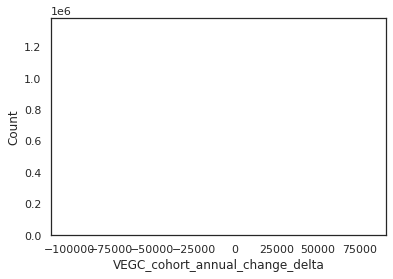

In [73]:
sns.histplot(data = tem_var_plt_c
             , x = 'VEGC_cohort_annual_change_delta'
            ,hue='forest_type')



In [71]:
tem_var_plt_c.groupby('forest_type')[['VEGC_monthly_mean','SOILORGC_monthly_mean']].mean()

VEGC_monthly_mean  \
forest_type                                                  
Boreal Forest                                  2143.287826   
Forested Boreal Wetlands                       2039.612822   
Mixed Temperate Forests                        2995.981458   
Temperate Broadleaved Evergreen Forests        3230.425970   
Temperate Coniferous Forests                   3567.700262   
Temperate Deciduous Forests                    2971.325577   
Tropical Evergreen Forests                    11248.128582   

                                         SOILORGC_monthly_mean  
forest_type                                                     
Boreal Forest                                      9576.548660  
Forested Boreal Wetlands                           9790.245013  
Mixed Temperate Forests                            2278.400187  
Temperate Broadleaved Evergreen Forests            5045.442425  
Temperate Coniferous Forests                       7649.392040  
Temperate Deciduous Forests                        2629.447382  
Tropical Evergreen Forests                         4077.241164

In [62]:
tem_var_plt_npp = tem_var.loc[tem_var['NPP_monthly_mean'].between(-50,500)]
len(tem_var_plt_npp)/len(tem_var)

0.9901204781988481

In [66]:
tem_var_plt_npp.columns

Index(['model', 'scenario', 'grid_group', 'lon', 'lat', 'forest_type',
       'current_veg', 'year', 'silt_clay', 'stand_age_interval_min',
       'cohort_area', 'land_area', 'AVAILN_monthly_mean',
       'AVAILN_cohort_annual_change_delta',
       'AVAILN_cohort_annual_change_percent', 'GPP_monthly_mean',
       'GPP_cohort_annual_change_delta', 'GPP_cohort_annual_change_percent',
       'LAI_monthly_mean', 'LAI_cohort_annual_change_delta',
       'LAI_cohort_annual_change_percent', 'NCE_monthly_mean',
       'NCE_cohort_annual_change_delta', 'NCE_cohort_annual_change_percent',
       'NEP_monthly_mean', 'NEP_cohort_annual_change_delta',
       'NEP_cohort_annual_change_percent', 'NETNMIN_monthly_mean',
       'NETNMIN_cohort_annual_change_delta',
       'NETNMIN_cohort_annual_change_percent', 'NPP_monthly_mean',
       'NPP_cohort_annual_change_delta', 'NPP_cohort_annual_change_percent',
       'SOILORGC_monthly_mean', 'SOILORGC_cohort_annual_change_delta',
       'SOILORGC_cohort_an

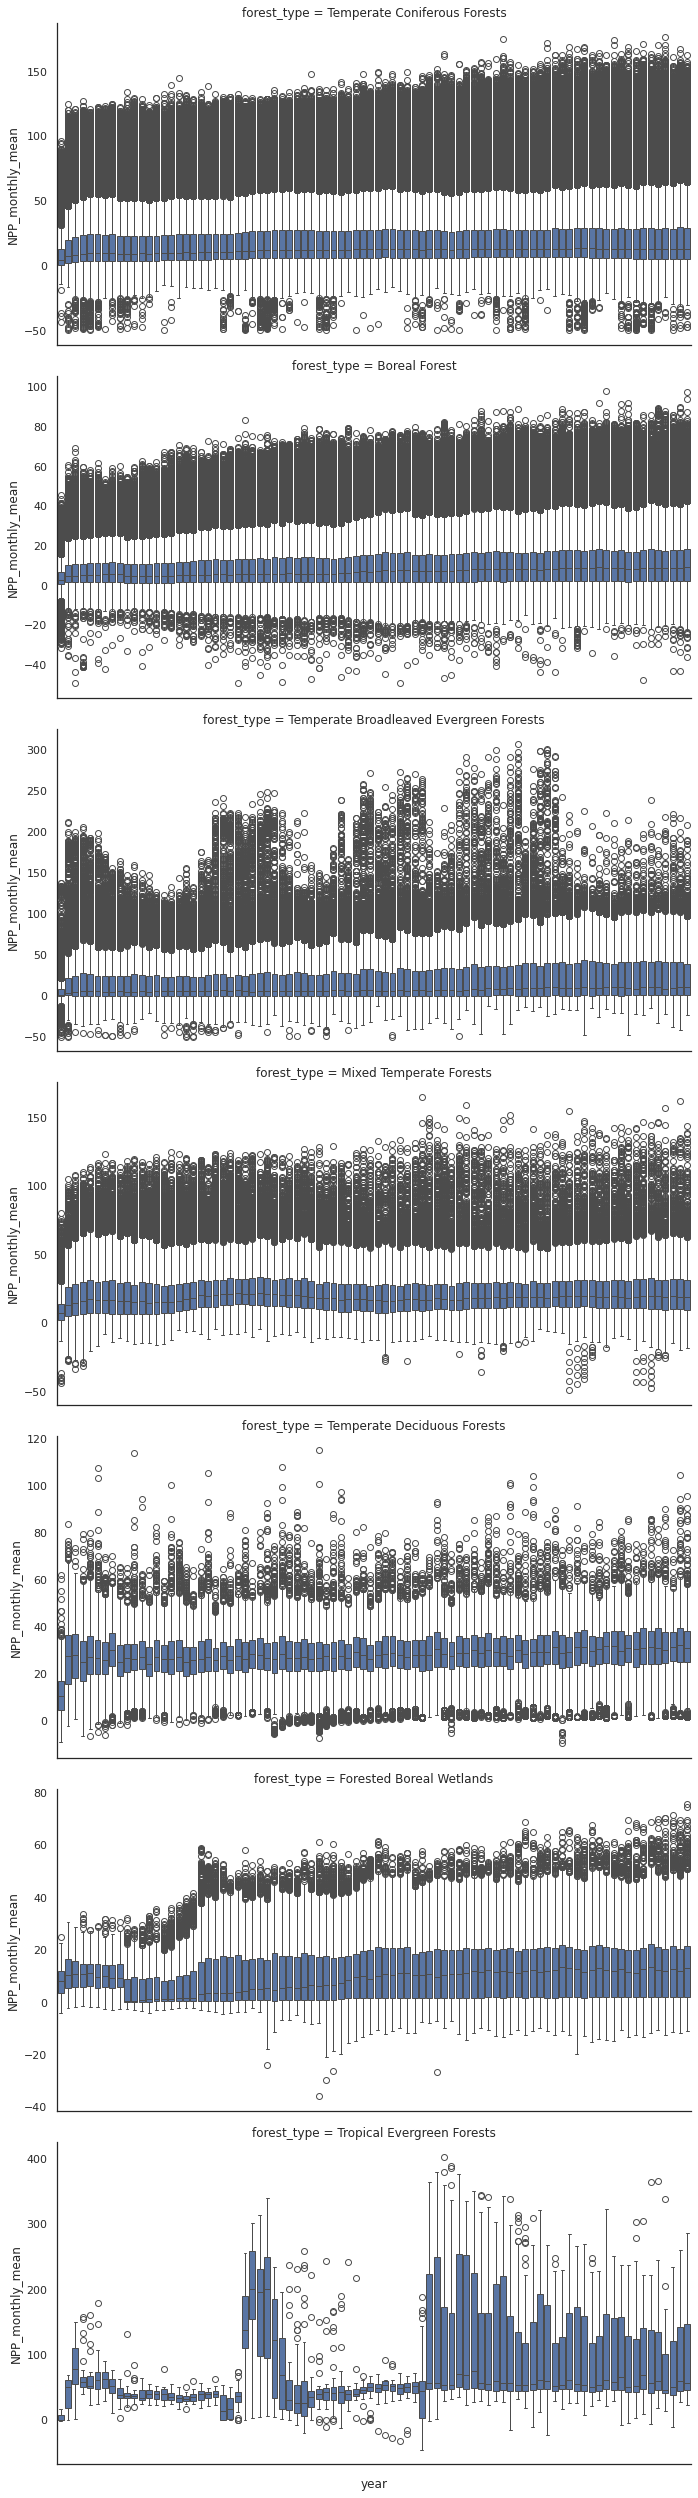

In [68]:
sns.set(style="white")

# Create the FacetGrid object with an adjusted aspect for a wider facet
# Added the aspect parameter to control the width.
g = sns.FacetGrid(tem_var_plt_npp, col="forest_type", col_wrap=1, sharex=True, sharey=False, height=5, aspect=2)  # Adjust 'aspect' as needed

# Create the box plots.
# Added the 'order' parameter to ensure the dxc c correctly.
g.map(sns.boxplot, 'year', 'NPP_monthly_mean', order=sorted(tem_var_plt_npp['year'].unique()))

# Rotate the x-axis labels for better readability and adjust the layout.
g.set_xticklabels(rotation=90)

# Show the ploteds
plt.show()

In [69]:
tem_var_plt_npp.groupby('forest_type')['NPP_monthly_mean'].mean()

forest_type
Boreal Forest                               9.963845
Forested Boreal Wetlands                   12.055428
Mixed Temperate Forests                    21.766115
Temperate Broadleaved Evergreen Forests    20.400057
Temperate Coniferous Forests               19.682778
Temperate Deciduous Forests                28.232494
Tropical Evergreen Forests                 81.684370
Name: NPP_monthly_mean, dtype: float64

ValueError: List of boxplot statistics and `positions` values must have same the length

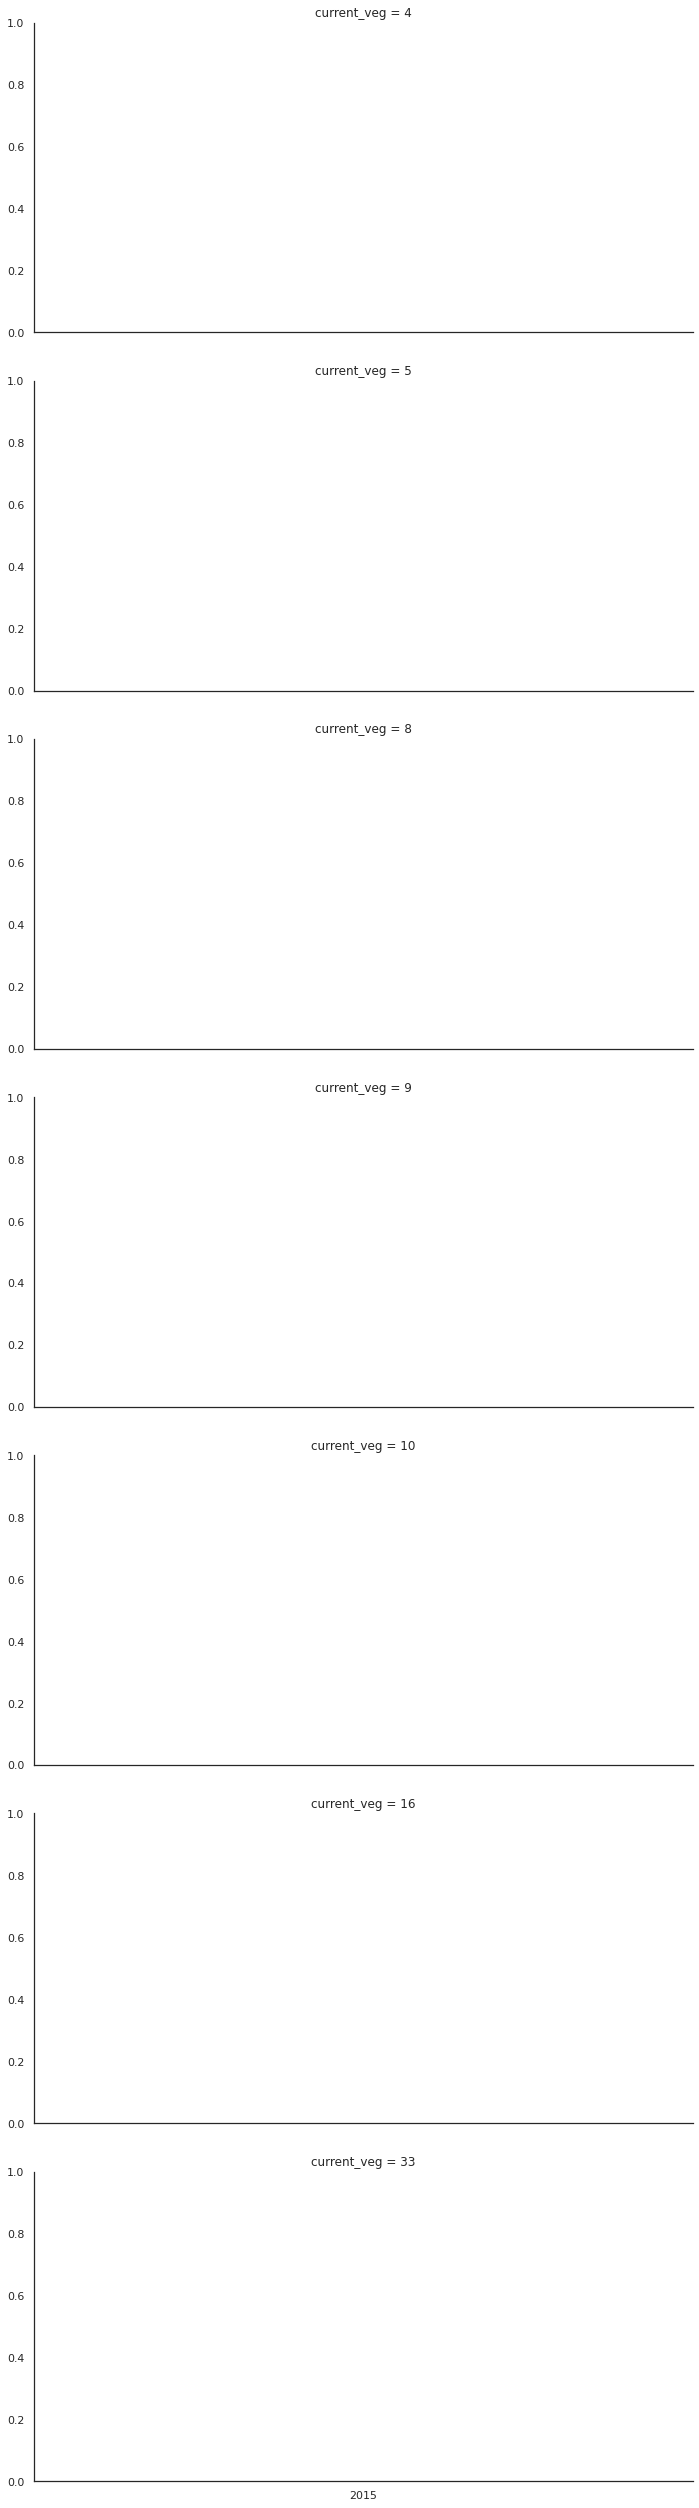

In [64]:
sns.set(style="white")

# Create the FacetGrid object with an adjusted aspect for a wider facet
# Added the aspect parameter to control the width.
g = sns.FacetGrid(tem_var_plt_npp, col="current_veg", col_wrap=1, sharex=True, sharey=False, height=5, aspect=2)  # Adjust 'aspect' as needed

# Create the box plots.
# Added the 'order' parameter to ensure the dxc c correctly.
g.map(sns.boxplot, 'stand_age_interval_min', 'NPP_monthly_mean', order=sorted(tem_var_plt_npp['year'].unique()))

# Rotate the x-axis labels for better readability and adjust the layout.
g.set_xticklabels(rotation=90)

# Show the ploteds
plt.show()

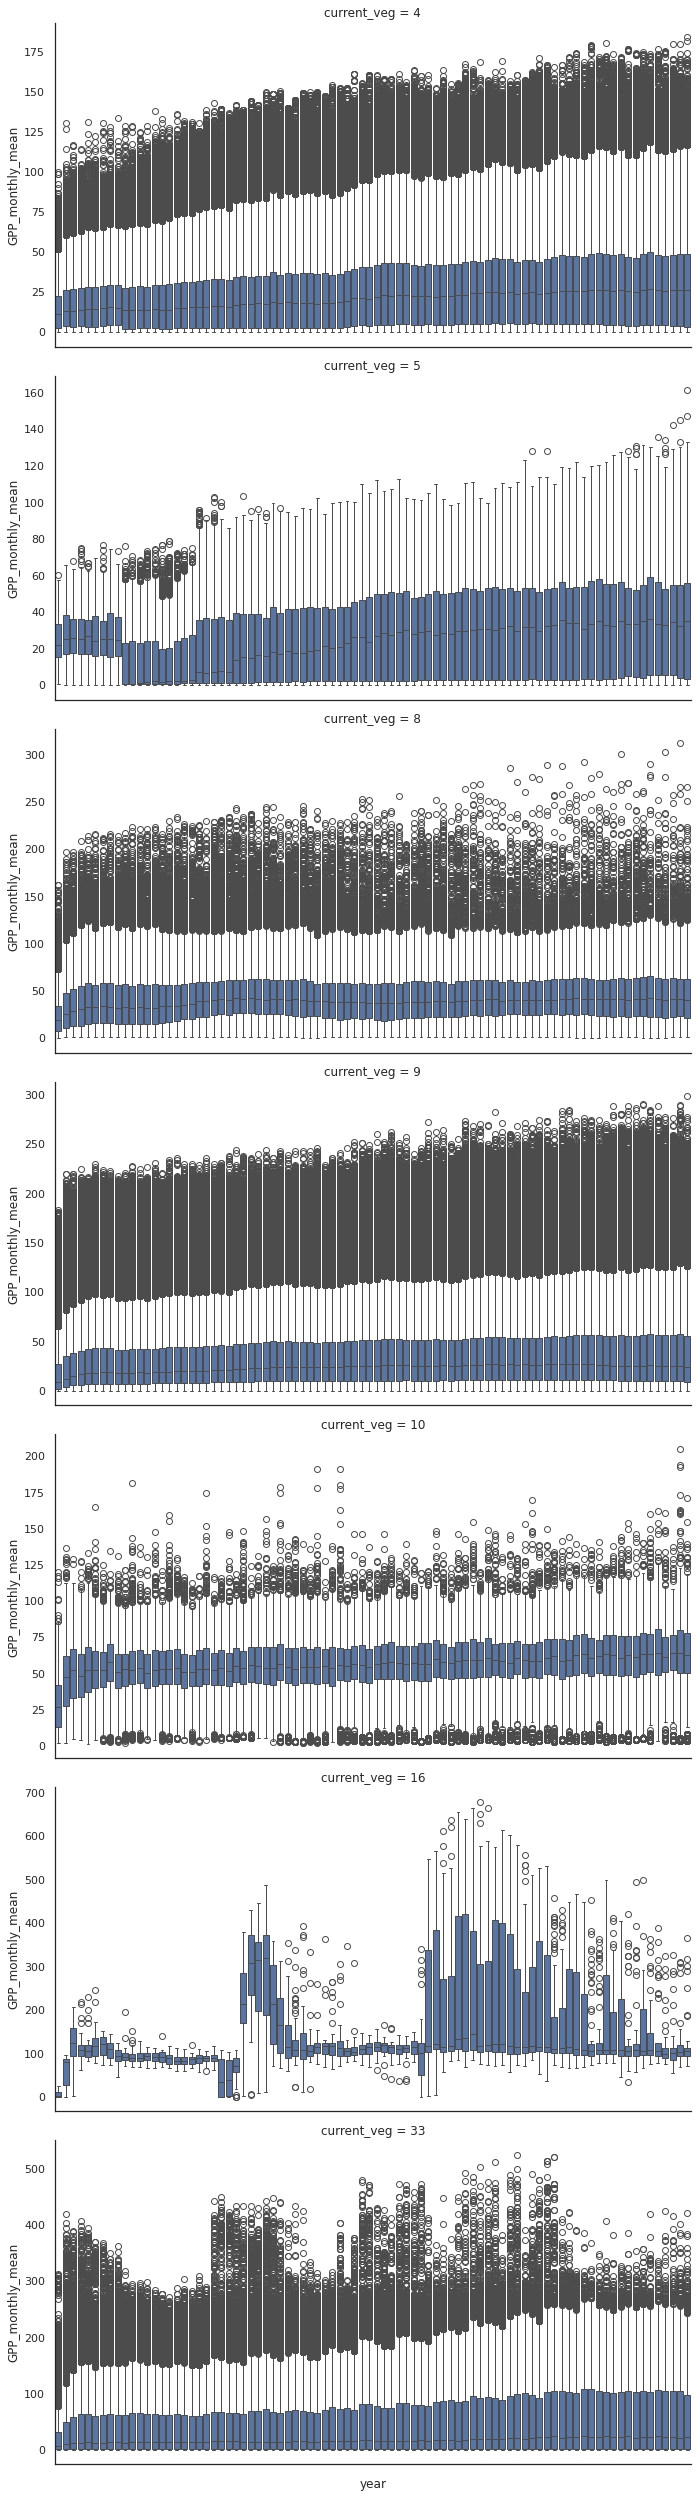

In [57]:
sns.set(style="white")

# Create the FacetGrid object with an adjusted aspect for a wider facet
# Added the aspect parameter to control the width.
g = sns.FacetGrid(tem_var_plt, col="current_veg", col_wrap=1, sharex=True, sharey=False, height=5, aspect=2)  # Adjust 'aspect' as needed

# Create the box plots.
# Added the 'order' parameter to ensure the dxc c correctly.
g.map(sns.boxplot, 'year', 'GPP_monthly_mean', order=sorted(tem_var_plt['year'].unique()))

# Rotate the x-axis labels for better readability and adjust the layout.
g.set_xticklabels(rotation=90)

# Show the ploteds
plt.show()

In [22]:
len(tem_var.loc[tem_var['VEGC_monthly_mean'] > 30000])
###are these all messed up rows? or is only vegc

160729

In [23]:
tem_var_plt = tem_var.loc[tem_var['VEGC_monthly_mean'] < 30000]
# plt.scatter(tem_var_plt['stand_age_interval_min'], tem_var_plt['VEGC_monthly_mean'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


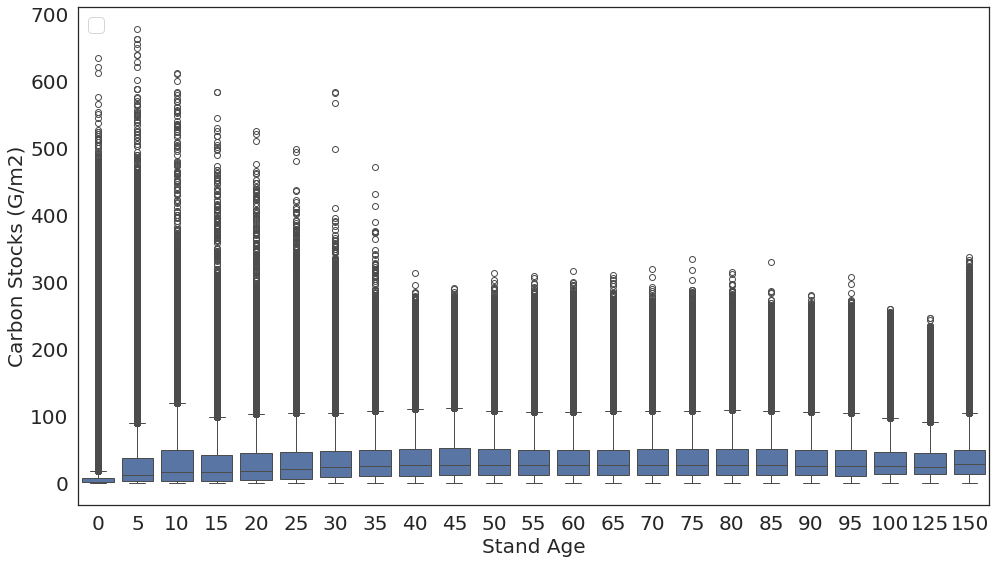

In [29]:
sns.set(style="white")

# Create the line plot using Seaborn's lineplot
plt.figure(figsize=(14, 8))  # Adjust figure size if needed
# custom_palette = {' VEGC ': 'limegreen', ' SOILORGC ': 'darkgreen'}

sns.boxplot(x='stand_age_interval_min', y='GPP_monthly_mean'#, hue='current_veg'
                # ,palette=custom_palette
                # , style = 'variable'
             # , linewidth = 3
        
             , data=tem_var)

# Add the second variable to the same plot
# sns.lineplot(x='stand_age_interval_min', y=' SOILORGC ', style='forest_zone', color = 'brown', linewidth = 3, data=pfts3, markers=True, legend=False)

plt.xlabel('Stand Age', fontsize = 20)
plt.ylabel('Carbon Stocks (G/m2)', fontsize = 20)
plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=20)
plt.legend(title='', prop={'size': 20}, loc = 'upper left')
plt.tight_layout()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


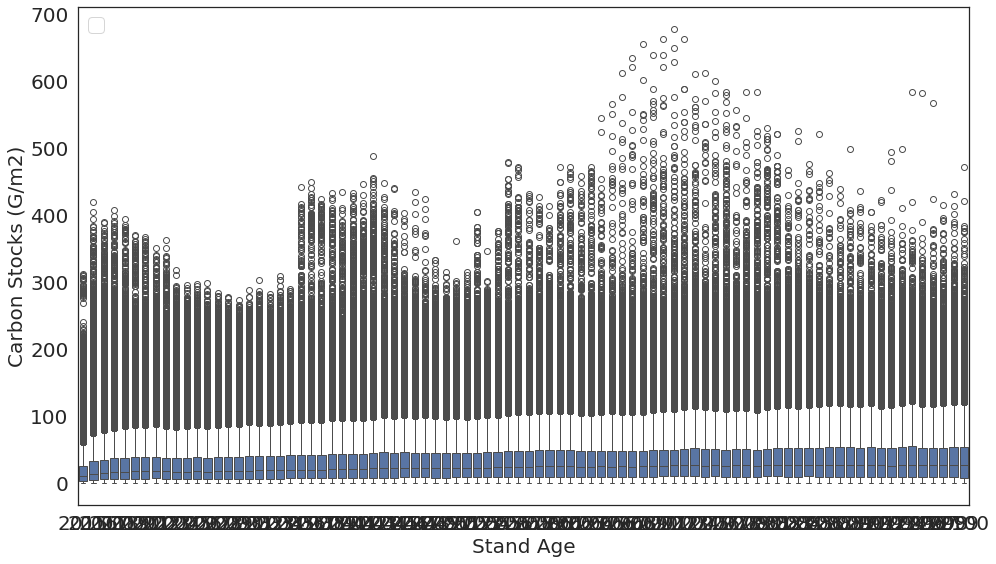

In [30]:
sns.set(style="white")

# Create the line plot using Seaborn's lineplot
plt.figure(figsize=(14, 8))  # Adjust figure size if needed
# custom_palette = {' VEGC ': 'limegreen', ' SOILORGC ': 'darkgreen'}

sns.boxplot(x='year', y='GPP_monthly_mean'#, hue='current_veg'
                # ,palette=custom_palette
                # , style = 'variable'
             # , linewidth = 3
        
             , data=tem_var.loc[tem_var['GPP_monthly_mean']<200])

# Add the second variable to the same plot
# sns.lineplot(x='stand_age_interval_min', y=' SOILORGC ', style='forest_zone', color = 'brown', linewidth = 3, data=pfts3, markers=True, legend=False)

plt.xlabel('Stand Age', fontsize = 20)
plt.ylabel('Carbon Stocks (G/m2)', fontsize = 20)
plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=20)
plt.legend(title='', prop={'size': 20}, loc = 'upper left')
plt.tight_layout()
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


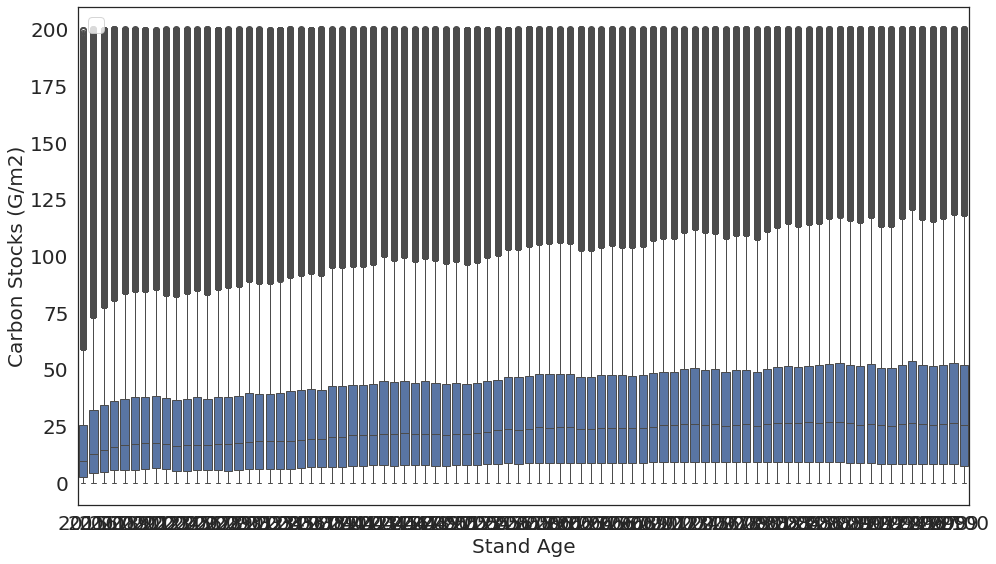

In [31]:
sns.set(style="white")

# Create the line plot using Seaborn's lineplot
plt.figure(figsize=(14, 8))  # Adjust figure size if needed
# custom_palette = {' VEGC ': 'limegreen', ' SOILORGC ': 'darkgreen'}

sns.boxplot(x='year', y='GPP_monthly_mean'#, hue='current_veg'
                # ,palette=custom_palette
                # , style = 'variable'
             # , linewidth = 3
        
             , data=tem_var.loc[tem_var['GPP_monthly_mean']<200])

# Add the second variable to the same plot
# sns.lineplot(x='stand_age_interval_min', y=' SOILORGC ', style='forest_zone', color = 'brown', linewidth = 3, data=pfts3, markers=True, legend=False)

plt.xlabel('Stand Age', fontsize = 20)
plt.ylabel('Carbon Stocks (G/m2)', fontsize = 20)
plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=20)
plt.legend(title='', prop={'size': 20}, loc = 'upper left')
plt.tight_layout()
plt.show()



In [ ]:
### plot related climate with tem variables by veg type
tem_var

In [ ]:
###scatterplots of stand age by variables

# Define the number of rows and columns for the subplot grid
n_rows = 3
n_cols = 5

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8), constrained_layout=True)

# Flatten the array of axes so we can loop through it
axes = axes.flatten()

for i, y_var in enumerate(tem_var.columns[tem_var.columns.str.contains('monthly_mean')]):
    # Create a scatter plot in the corresponding subplot
    axes[i].scatter(tem_var['stand_age_interval_min'], tem_var[y_var])
    axes[i].set_title(f'x vs {y_var}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel(y_var)

# If there are any remaining subplots, turn them off
for ax in axes[i+1:]:
    ax.axis('off')

# Adjust the plot titles so that they do not overlap
plt.tight_layout()
# Optionally, add a main title for the entire grid
plt.suptitle('Scatter Plots of TEM Vars vs. Stand Age', va='bottom', fontsize=16)
plt.show()

In [ ]:
####average by year and stand age

In [ ]:
### global plots of ...
### range of responses by gridcell 

In [ ]:
### correlation of variables by model